<span style="color:orange; font-size:18px;"><strong>About This Dataset:</strong></span>

- The <strong>Intrusion Detection Logs (Normal, Bot Scan)</strong> dataset was downloaded from Kaggle on <strong>07/08/2025</strong> by Jack Noble.

- This dataset contains information on <strong>8,846 records of network traffic</strong>, detailing their various attributes.

- The original columns in this dataset are:
  <strong>Source_IP, Destination_IP, Port, Request_Type, Protocol, Payload_Size, User_Agent, Status, Intrusion, and Scan_Type</strong>

- <strong>Intrusion Detection Logs (Normal, Bot, Scan) – Kaggle:</strong>  
  🔗 <em>https://www.kaggle.com/datasets/developerghost/intrusion-detection-logs-normal-bot-scan/data</em>

- This dataset was licensed under the <strong>MIT License</strong> framework, which requires proper attrubtion, a link to the license can be found here:  
  🔗 <em>https://www.mit.edu/~amini/LICENSE.md</em>.

Released under MIT License:

- Copyright (c) 2013 Mark Otto.

- Copyright (c) 2017 Andrew Fong.

<span style="color:orange; font-size:18px;"><strong>Purpose of Analysis:</strong></span>

- Address a ***real-world* cybersecurity/analytics challenge** by analyzing and classifying **network traffic logs** from the fictitious Northwood Bank.

- Support the bank's IT security team in making **faster, more informed decisions** by identifying potentially **malicious network activity** (e.g., bots, scans).

- **Train classification models** (e.g., Logistic Regression, Discriminant Analysis, Neural Network, Classification Tree) to **differentiate between normal and malicious traffic** using historical connection attributes and behavioral patterns.

**Now, let's begin!**

**<span style="color:orange; font-size:18px;">Read in the required modules and change our default pandas settings:</span>**

In [1]:
#  Use the "try" flow control argument to "try" and import all necessary packages
try:
    # Basic operating system packages
    # Import the 'os' library, used to interact with the operating system
    import os
    
    # Math and statistics packages
    # Import the 'pandas' library, used for data manipulation and analysis - give it the alias 'pd'
    import pandas as pd
    # Import the 'numpy' library, used for numerical computations - give it the alias 'np'
    import numpy as np
    
    # Graphing and visualization packages
    # Import 'matplotlib.pyplot', used for plotting graphs and figures - give it the alias 'plt'
    import matplotlib.pyplot as plt
    # Import 'ticker' from 'matplotlib', provides tools to configure axis ticks on graphs
    import matplotlib.ticker as ticker
    # Import 'seaborn', a statistical data visualization library - give it the alias 'sns'
    import seaborn as sns

    # Machine Learning packages
    # Import the "LogisticRegression" algorithm from sklearn's .linear_model method, used to create classification models
    from sklearn.linear_model import LogisticRegression
    # Import the "LinearDiscriminantAnalysis" algorithm from sklearn's .discriminant_analysis method, used to create Discriminant Analysis models for classification
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    # Import the "MLPClassifier" algorithm from sklearn's .neural_network method, used to create neural network models for classification
    from sklearn.neural_network import MLPClassifier
    # Import "DecisionTreeClassifier" algorithm from sklearn's .tree method, used to build non-linear classification trees
    from sklearn.tree import DecisionTreeClassifier
    # Import "graph_from_dot_data" from pydotplus, used to convert decision tree DOT format into a graph object for export
    from pydotplus import graph_from_dot_data
    # Import "export_graphviz" from sklearn's .tree method, used to convert a trained decision tree model into DOT format for visualization
    from sklearn.tree import export_graphviz
    # Import 'train_test_split' from sklearn's .model_selection method, allows us to split data into training and testing subsets
    from sklearn.model_selection import train_test_split
    # Import the SMOTE algorithm from the imblearn.over_sampling module, used to deal with class imbalances on target variables
    from imblearn.over_sampling import SMOTE
    # Import "OneHotEncoder" from sklearn's .preprocessing method, allows us to dummy encode variables - storing them in a 'state' for inverse transformation upon final output
    from sklearn.preprocessing import OneHotEncoder
    # Import "LabelEncoder" from sklearn's .preprocessing method, used to convert categorical labels into numeric format for classification models
    from sklearn.preprocessing import LabelEncoder
    # 'accuracy_score', 'classification_report', 'confusion_matrix', 'ConfusionMatrixDisplay', 'roc_auc_score', 'roc_curve', 'auc', and 'cohen_kappa_score' - Metrics to evaluate classification model's performance
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc, cohen_kappa_score
    # Import "permutation_importance" from sklearn's .inspection method, used to 
    from sklearn.inspection import permutation_importance
    
    # Print success message indicating successful imports
    print('All modules successfully imported.')
    
#  Use an "except" clause to catch specific import errors and rename the error to 'moderror'
except ModuleNotFoundError as moderror:
    print('Module failed to import: ' + str(moderror.name))

#  Use an "except" clause to catch any unexpected errors
except Exception as ex:
    print('Unexpected error occurred during imports: ' + str(ex))

All modules successfully imported.


In [2]:
#  Use the "try" flow control argument to "try" and adjust the display settings for pandas within the IDE
try:
    # Configure pandas display settings for better visibility of datasets within the IDE
    # 'display.max_columns' - Ensures all columns are displayed when printing DataFrames
    pd.set_option('display.max_columns', None)
    # 'display.width' - Sets the display width to accommodate large DataFrames without truncation
    pd.set_option('display.width', 2000)
    # 'display.max_rows' - Limits the number of rows displayed when printing DataFrames (useful for sampling)
    pd.set_option('display.max_rows', 50)
    # Disable scientific notation for better readability
    pd.set_option('display.float_format', '{:.2f}'.format)

    # Print success message indicating display settings were applied
    print('Display settings successfully applied.')

#  Use an "except" clause to catch if pandas ('pd') is not defined or imported incorrectly
except NameError:
    print('Error: Pandas (\'pd\') is not defined. Ensure that pandas is imported using: import pandas as pd.')

#  Use an "except" clause to catch if the provided 'pd.set_option()' settings are incorrect or invalid
except ValueError as valErr:
    print('Error: Invalid value provided to \'pd.set_option()\'. Details: ' + str(valErr))

#  Use an "except" clause to catch unexpected errors during the settings configuration process
except Exception as ex:
    print('Unexpected error occurred while configuring display settings: ' + str(ex))

Display settings successfully applied.


**<span style="color:red; font-size:18px;">Initialize our filepath variable and locate the dataset:</span>**

In [3]:
# Initialize our CSV file path (Network Historical)
networkFilePath = r'C:\Users\jackn\Desktop\SCHOOL\Graduate School (2024 - 2025)\Semester 5 (SUM 25)\Term B\MBA 6560 - Analytics for Executives (aCAP Project)\Module 7 (Final Project)\Raw\Network_logs.csv'

In [4]:
# Attempt to locate the dataset (using os.path.exists()) via the provided file path (located in the cell above)
if not os.path.exists(networkFilePath):
    # Print our our error message for our user if the file path is NOT found (concatenate our filePath variable to string)
    print('Error - the file at: ' + networkFilePath + ' was not found!')
# Otherwise, if our file is located
else:
    # Print our success message for user feedback
    print('Dataset successfully located.')

Dataset successfully located.


**<span style="color:red; font-size:18px;">Use pandas (and our file path variable) to read our file:</span>**

In [5]:
#  Use the "try" flow control argument to "try" and read our selected file
try:
    # Use pandas (alias = pd) to read our .CSV file, getting our network data. Then, store this data in a new variable (i.e., df)
    df = pd.read_csv(networkFilePath)
    # If the network dataset was located and successfully loaded, inform the user with a success message
    print('Network data is now sucessfully loaded.')
#  Otherwise, use an "except" clause to leave the "try" flow control argument. If there is an error, rename the error to 'fileError'
except Exception as ex:
    # Print out the error message for our user (a combo of string and our new exception variable 'ex')
    print('An unexpected error occured when loading the network data!: ' + str(ex))

Network data is now sucessfully loaded.


**<span style="color:Green; font-size:18px;">Now let's do some EDA and view the important characteristics of our dataset:</span>**

In [6]:
# Get the dataset's information using pandas' '.info()' function (shows columns, non-null counts, data types, and memory usage)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8846 entries, 0 to 8845
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Source_IP       8846 non-null   object
 1   Destination_IP  8846 non-null   object
 2   Port            8846 non-null   int64 
 3   Request_Type    8846 non-null   object
 4   Protocol        8846 non-null   object
 5   Payload_Size    8846 non-null   int64 
 6   User_Agent      8846 non-null   object
 7   Status          8846 non-null   object
 8   Intrusion       8846 non-null   int64 
 9   Scan_Type       8846 non-null   object
dtypes: int64(3), object(7)
memory usage: 691.2+ KB
None


In [7]:
# Use pandas' '.describe()' function to see descriptive statistics (mean, st.dev, min, max, and quartiles)
print(df.describe())

          Port  Payload_Size  Intrusion
count  8846.00       8846.00    8846.00
mean    887.13       1598.76       0.10
std    4042.07        915.62       0.29
min      21.00          0.00       0.00
25%      22.00        836.25       0.00
50%      53.00       1580.00       0.00
75%      80.00       2326.00       0.00
max   31337.00       4997.00       1.00


In [8]:
# Get a sum of all of the null values in each column, using pandas' '.isnull()' and '.sum()' functions
print(df.isnull().sum())

Source_IP         0
Destination_IP    0
Port              0
Request_Type      0
Protocol          0
Payload_Size      0
User_Agent        0
Status            0
Intrusion         0
Scan_Type         0
dtype: int64


In [9]:
# View the FIRST five rows of our dataset
print('FIRST five rows of data: ' + '\n')
display(df.head())

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(df.tail())

FIRST five rows of data: 



,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
0,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,0,Normal
1,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,1,BotAttack
2,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,0,Normal
3,192.168.30.40,130.169.82.211,25,HTTPS,TCP,666,Mozilla/5.0,Success,0,Normal
4,192.168.43.179,35.140.102.220,22,FTP,TCP,2821,Mozilla/5.0,Success,0,Normal



LAST five rows of data: 



,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Intrusion,Scan_Type
8841,192.168.62.111,217.201.54.87,22,DNS,UDP,651,python-requests/2.25.1,Failure,0,Normal
8842,192.168.154.70,11.93.131.139,22,Telnet,ICMP,592,Nikto/2.1.6,Success,0,Normal
8843,192.168.199.211,213.172.225.26,443,DNS,TCP,518,nmap/7.80,Success,0,Normal
8844,192.168.107.115,194.38.119.179,53,SSH,TCP,1149,Mozilla/5.0,Success,0,Normal
8845,201.232.85.16,168.101.218.238,31337,FTP,TCP,12,python-requests/2.25.1,Failure,1,PortScan


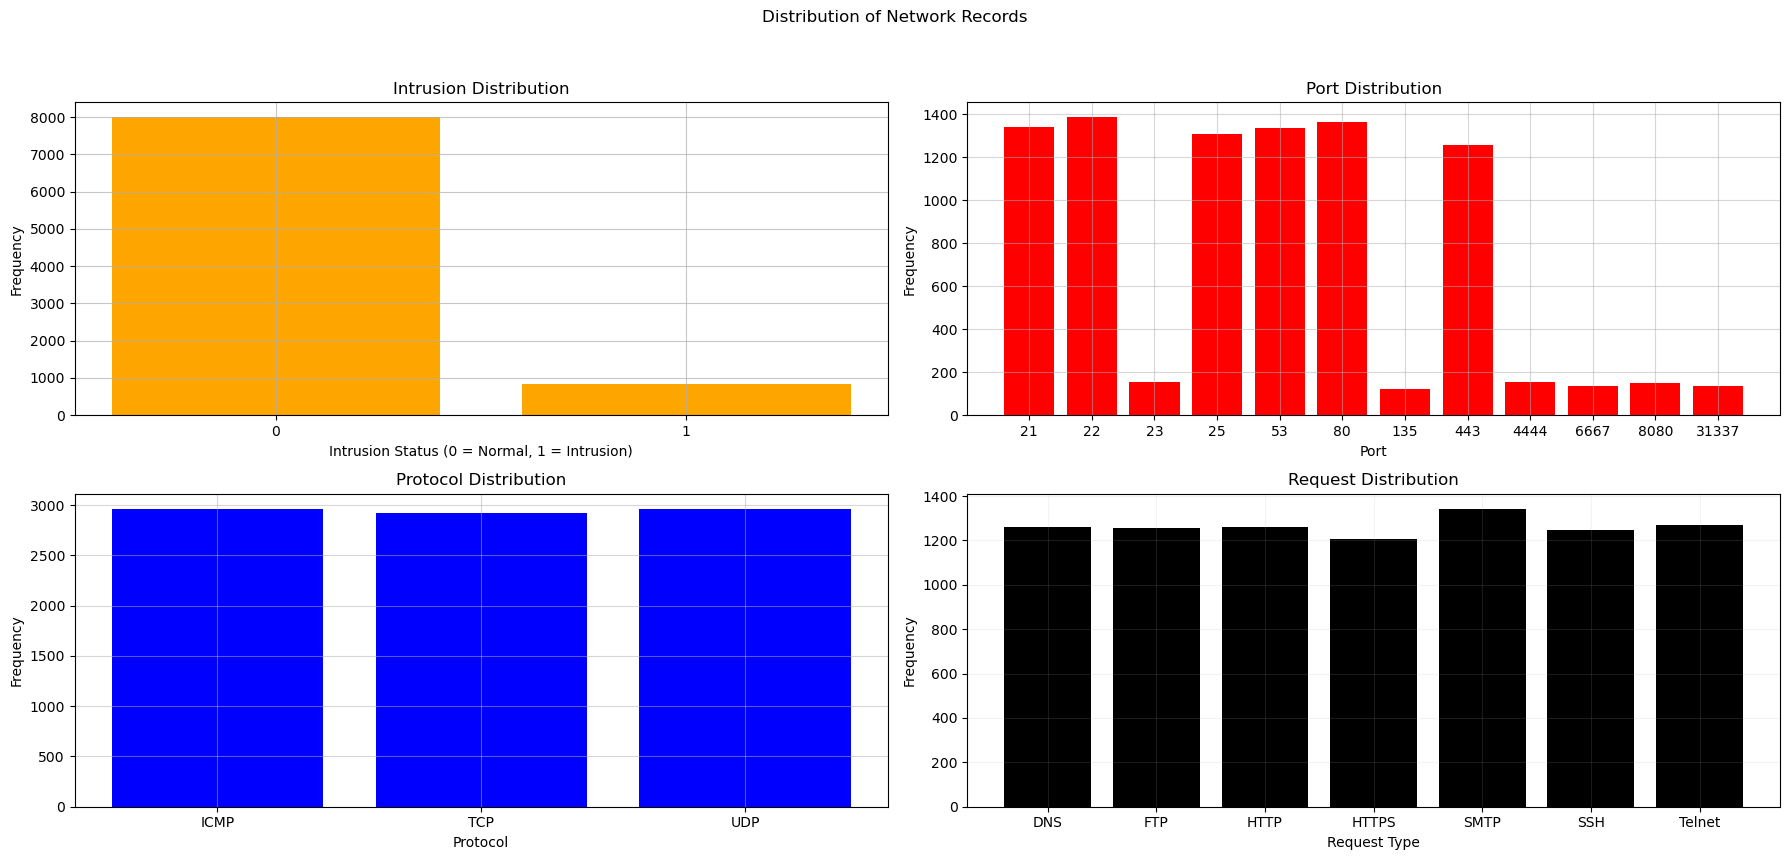

In [10]:
# Use integer (ex: 3, 8, 1) bins for discrete features like Age and Absences
intrusionCounts = df['Intrusion'].value_counts().sort_index()
portCounts = df['Port'].value_counts().sort_index()
protocolCounts = df['Protocol'].value_counts().sort_index()
requestCounts = df['Request_Type'].value_counts().sort_index()

# Create a 1x3 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(18, 9))
fig.suptitle('Distribution of Network Records', fontsize=12)

# Plot histograms
axes[0, 0].bar(intrusionCounts.index.astype(str), intrusionCounts.values, color='orange')
axes[0, 0].grid(True, alpha=0.7)
axes[0, 0].set_title('Intrusion Distribution')
axes[0, 0].set_xlabel('Intrusion Status (0 = Normal, 1 = Intrusion)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].bar(portCounts.index.astype(str), portCounts.values, color='red')
axes[0, 1].grid(True, alpha=0.5)
axes[0, 1].set_title('Port Distribution')
axes[0, 1].set_xlabel('Port')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].bar(protocolCounts.index.astype(str), protocolCounts.values, color='blue')
axes[1, 0].grid(True, alpha=0.5)
axes[1, 0].set_title('Protocol Distribution')
axes[1, 0].set_xlabel('Protocol')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].bar(requestCounts.index.astype(str), requestCounts.values, color='black')
axes[1, 1].grid(True, alpha=0.15)
axes[1, 1].set_title('Request Distribution')
axes[1, 1].set_xlabel('Request Type')
axes[1, 1].set_ylabel('Frequency')

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

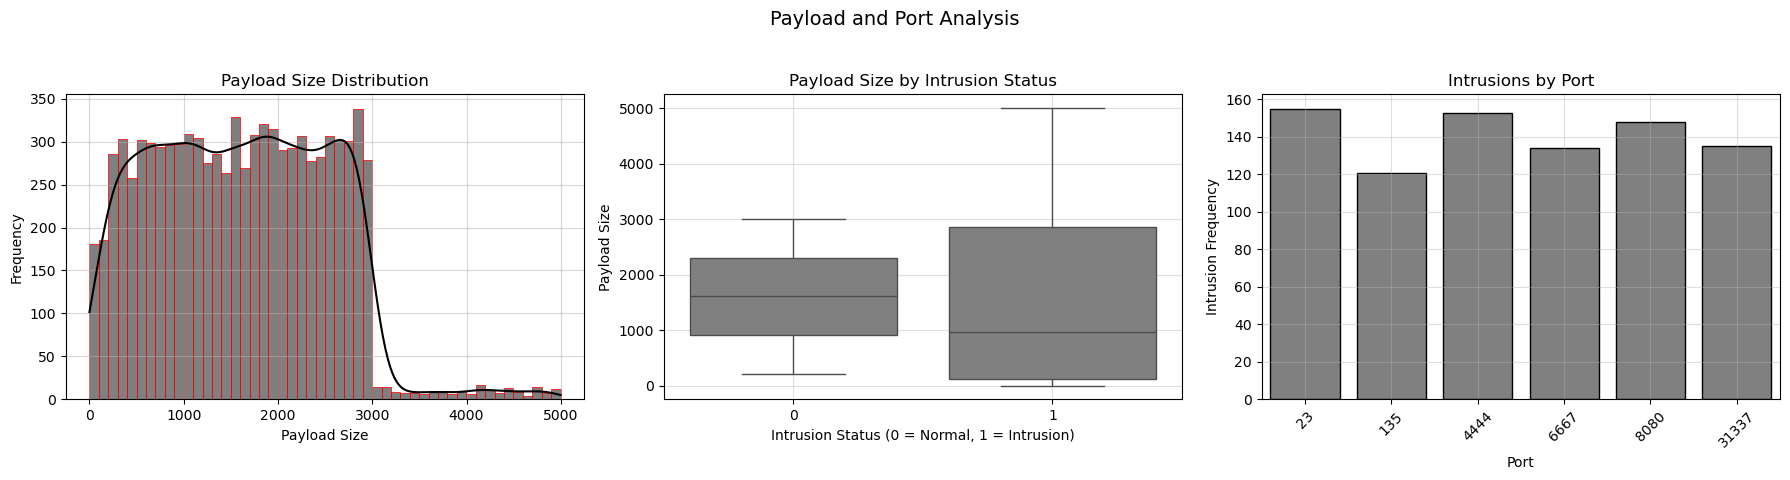

In [11]:
# Count intrusions per port
portIntrusions = df[df['Intrusion'] == 1]['Port'].value_counts()

# Create 1x3 subplot layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Give the canvas a title 
fig.suptitle('Payload and Port Analysis', fontsize=14)

# Histogram of Payload Size Distributions
sns.histplot(df['Payload_Size'], bins=50, kde=True, color='black', edgecolor='red', ax=axes[0])
axes[0].set_title('Payload Size Distribution')
axes[0].set_xlabel('Payload Size')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.5)

# Boxplot of Payload Size by Intrusion
sns.boxplot(x='Intrusion', y='Payload_Size', data=df, color='grey', ax=axes[1])
axes[1].set_title('Payload Size by Intrusion Status')
axes[1].set_xlabel('Intrusion Status (0 = Normal, 1 = Intrusion)')
axes[1].set_ylabel('Payload Size')
axes[1].grid(True, alpha=0.4)

# Barplot of Intrusion Count by Port
portIntrusions = df[df['Intrusion'] == 1]['Port'].value_counts().sort_values(ascending=False)
sns.barplot(x=portIntrusions.index, y=portIntrusions.values, color='gray', edgecolor='black', ax=axes[2])
axes[2].set_title('Intrusions by Port')
axes[2].set_xlabel('Port')
axes[2].set_ylabel('Intrusion Frequency')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.4)

# Layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the charts
plt.show()

**<span style="color:Green; font-size:18px;">Now it's time to pre-process our data:</span>**

- First, dummy encode any categorical variables with the encoders ("OneHotEncoder" and "LabelEncoder"), and avoid the dummy variable "trap"

- Second, define our feature and target variables

- Then, split the dataset into training and testing sets

- Finally, fix the class imbalance for the "Intrusion" variable

In [12]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
networkData = df.copy()

In [13]:
# Create a column that stores a unique ID for record identification
networkData['Id'] = networkData.index + 1

# Save the Id's for later merging and matching with original data (for final exports)
ids = networkData['Id']

# Reorder the columns with the unique ID column listed first
networkData = networkData[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol', 'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion']]

# Reset and drop the old index column
networkData = networkData.reset_index(drop=True)

# Display the new columns/data with the new "Id" column now added
display(networkData.head(3))

,Id,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Scan_Type,Intrusion
0,1,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,Normal,0
1,2,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,BotAttack,1
2,3,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,Normal,0


**<span style="color:Green; font-size:18px;">Dummy encode the non-numeric data:</span>**

In [14]:
# Dummy encode (aka - 'One-hot encode' the 'Request_Type', 'Protocol', 'Status', and 'Scan_Type' columns)
oneHotCols = ['Request_Type', 'Protocol', 'Status', 'Scan_Type']
# Label encode the 'Source_IP' and 'Destination_IP' columns due to high cardinality
labelEncodeCols = ['Source_IP', 'Destination_IP', 'User_Agent']

# Store encoders for future inverse transforms if needed
oneHotEncoders = {}
labelEncoders = {}

# OneHotEncode loop
for col in oneHotCols:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')  # drop the first encoding
    transformed = encoder.fit_transform(networkData[[col]])
    newColNames = encoder.get_feature_names_out([col])
    networkData = networkData.drop(columns=[col])
    networkData[newColNames] = pd.DataFrame(transformed, index=networkData.index)
    oneHotEncoders[col] = encoder

# LabelEncode loop for high-cardinality columns
for col in labelEncodeCols:
    le = LabelEncoder()
    networkData[col] = le.fit_transform(networkData[col])
    labelEncoders[col] = le

# Print a success message for our user
print('Dummies created successfully,' + '\n' + '\n' + 'FIRST five rows of data:' + '\n')
display(networkData.head(3))

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(networkData.tail(3))

Dummies created successfully,

FIRST five rows of data:



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
0,1,1471,7335,80,2369,3,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
1,2,7561,8727,135,1536,2,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,3,955,8069,21,1183,2,0,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00



LAST five rows of data: 



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
8843,8844,3317,5829,443,518,4,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
8844,8845,285,4098,53,1149,0,0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
8845,8846,7553,2684,31337,12,5,1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


**<span style="color:Green; font-size:18px;">Define our feature and target variables:</span>**

In [15]:
# Prepare feature variables (full model)
X = networkData.drop(columns=['Id', 'Intrusion'])
# Prepare feature variables (REDUCED model)
X1 = networkData.drop(columns=['Id', 'Intrusion', 'Port', 'Payload_Size', 'Source_IP', 'Destination_IP'])

# Prepare the target variable 'Intrusion'
y = networkData[['Intrusion']]

# Print a success message for our user (full model)
print('Feature variables (full model):' + '\n' + '\n' + str(X.columns) + '\n' + '\n' + 'Target variable:' + '\n' + '\n' + str(y.columns) + '\n' + '\n')

# Print a success message for our user (REDUCED model)
print('Feature variables (REDUCED model):' + '\n' + '\n' + str(X1.columns) + '\n' + '\n' + 'Target variable:' + '\n' + '\n' + str(y.columns))

Feature variables (full model):

Index(['Source_IP', 'Destination_IP', 'Port', 'Payload_Size', 'User_Agent', 'Request_Type_FTP', 'Request_Type_HTTP', 'Request_Type_HTTPS', 'Request_Type_SMTP', 'Request_Type_SSH', 'Request_Type_Telnet', 'Protocol_TCP', 'Protocol_UDP', 'Status_Success', 'Scan_Type_Normal', 'Scan_Type_PortScan'], dtype='object')

Target variable:

Index(['Intrusion'], dtype='object')


Feature variables (REDUCED model):

Index(['User_Agent', 'Request_Type_FTP', 'Request_Type_HTTP', 'Request_Type_HTTPS', 'Request_Type_SMTP', 'Request_Type_SSH', 'Request_Type_Telnet', 'Protocol_TCP', 'Protocol_UDP', 'Status_Success', 'Scan_Type_Normal', 'Scan_Type_PortScan'], dtype='object')

Target variable:

Index(['Intrusion'], dtype='object')


**<span style="color:Green; font-size:18px;">Partition the data:</span>**

In [16]:
# Partition the dataset (networkData) into 80% training and 20% testing sets, use the "stratify" param to ensure an equal ratio of the "y" class ("Intrusion" in this case) in each set
X_train, X_test, y_train, y_test, idsTrain, idsTest = train_test_split(X, y, ids, test_size=0.2, stratify=y)
# Partition the dataset again for the REDUCED model
X_train1, X_test1, y_train1, y_test1, idsTrain1, idsTest1 = train_test_split(X1, y, ids, test_size=0.2, stratify=y)

# Print a success message for our user and view the shape of the (now partitioned - full model) data
print('Data successfully partitioned.' + '\n' + '\n' + 'Full Model training shape:' + '\n' + '(Rows, Columns)' + '\n' + '\n' + 'X Features:' + '\n' + str(X_train.shape) + '\n' + '\n' + 'Y (target) feature:' + '\n' + str(y_train.shape) + '\n')

# Print a success message for our user and view the shape of the (now partitioned - REDUCED model) data
print('Data successfully partitioned.' + '\n' + '\n' + 'Reduced Model training shape:' + '\n' + '(Rows, Columns)' + '\n' + '\n' + 'X Features:' + '\n' + str(X_train1.shape) + '\n' + '\n' + 'Y (target) feature:' + '\n' + str(y_train1.shape))

Data successfully partitioned.

Full Model training shape:
(Rows, Columns)

X Features:
(7076, 16)

Y (target) feature:
(7076, 1)

Data successfully partitioned.

Reduced Model training shape:
(Rows, Columns)

X Features:
(7076, 12)

Y (target) feature:
(7076, 1)


**<span style="color:Green; font-size:18px;">Address the class imbalance of the target variable (in both models) by using the SMOTE oversampling technique:</span>**

In [17]:
# Instantiate the SMOTE oversampler object with default settings
smote = SMOTE()

# Fit the SMOTE oversampling technique to the training data of the full model (**NOT testing, to avoid memorization**) to balance the minority class of the target variable (to balance the amount of 0's vs 1's)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Fit the SMOTE oversampling technique to the training data of the REDUCED model (**NOT testing, to avoid memorization**) to balance the minority class of the target variable (to balance the amount of 0's vs 1's)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1)

# Restore y_train to a flat, "pandas series"
y_train = pd.Series(y_train.values.ravel(), name='Intrusion')

# Restore y_train1 to a flat, "pandas series"
y_train1 = pd.Series(y_train1.values.ravel(), name='Intrusion')

# Print success message confirming new class distribution
print('SMOTE successfully applied to training data of the full model.' + '\n' + '\n' + 'New class distribution:' + '\n' + '\n' + str(y_train.value_counts()) + '\n' + '\n')
# Print success message confirming new class distribution
print('SMOTE successfully applied to training data of the REDUCED model.' + '\n' + '\n' + 'New class distribution:' + '\n' + '\n' + str(y_train1.value_counts()))

SMOTE successfully applied to training data of the full model.

New class distribution:

Intrusion
0    6399
1    6399
Name: count, dtype: int64


SMOTE successfully applied to training data of the REDUCED model.

New class distribution:

Intrusion
0    6399
1    6399
Name: count, dtype: int64


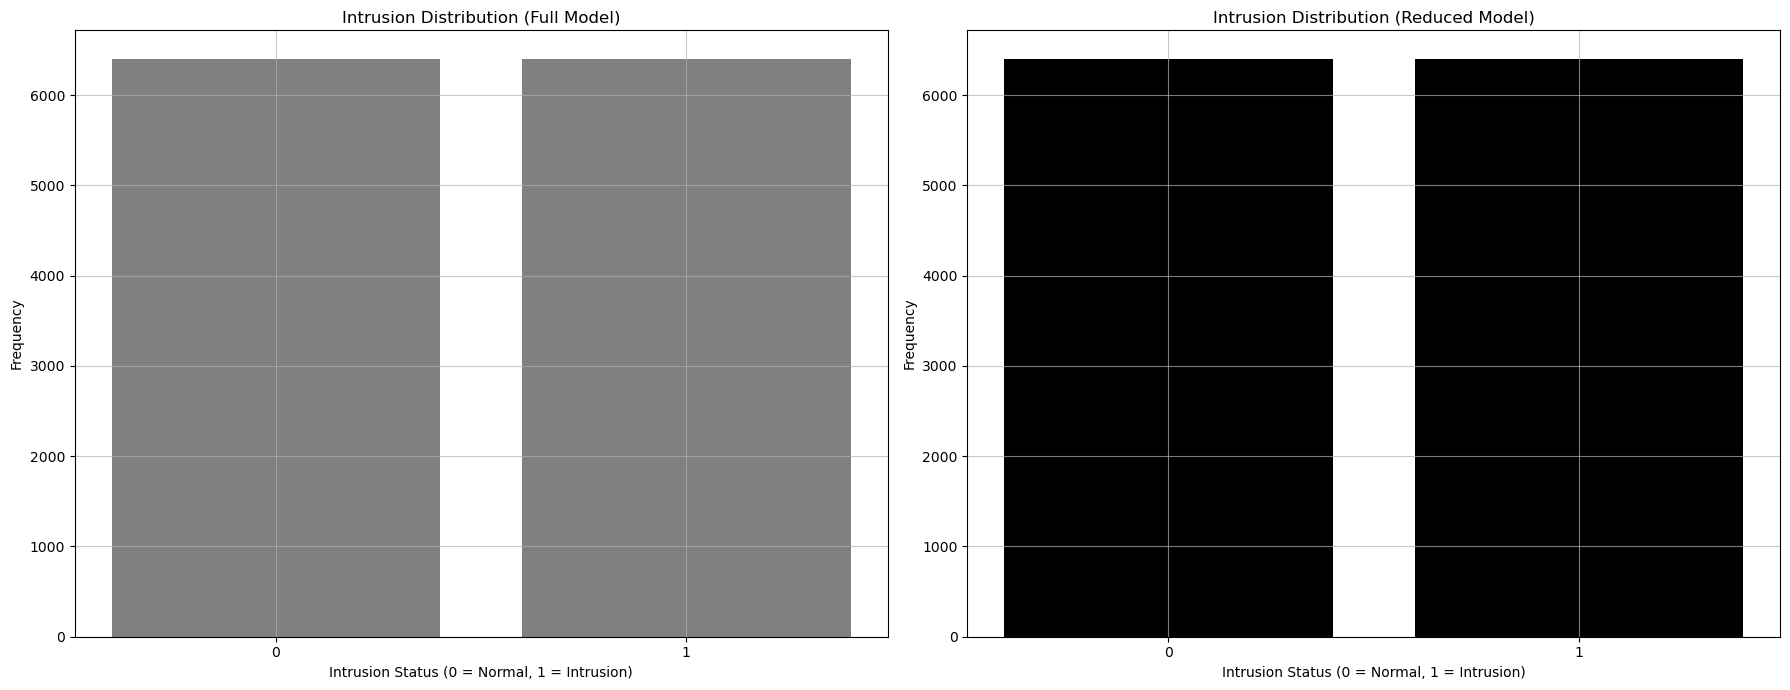

In [18]:
# Count 0's and 1's in both target variables
intrusionCounts = y_train.value_counts().sort_index()
intrusionCounts1 = y_train1.value_counts().sort_index()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot for full model
axes[0].bar(intrusionCounts.index.astype(str), intrusionCounts.values, color='grey')
axes[0].grid(True, alpha=0.7)
axes[0].set_title('Intrusion Distribution (Full Model)')
axes[0].set_xlabel('Intrusion Status (0 = Normal, 1 = Intrusion)')
axes[0].set_ylabel('Frequency')

# Plot for reduced model
axes[1].bar(intrusionCounts1.index.astype(str), intrusionCounts1.values, color='black')
axes[1].grid(True, alpha=0.7)
axes[1].set_title('Intrusion Distribution (Reduced Model)')
axes[1].set_xlabel('Intrusion Status (0 = Normal, 1 = Intrusion)')
axes[1].set_ylabel('Frequency')

# Automatically adjust layout
plt.tight_layout()

# Display the plot
plt.show()

**<span style="color:Yellow; font-size:18px;">Now it's time to build our Logistic Regression models (full and reduced):</span>**

- First, initialize our Logistic Regression models

- Next, fit the models to our data

- Then, let's investigate which features are our most important predictors for the model

In [19]:
#  Use the "try" flow control argument to "try" and create our model
try:
    # Initialize the Logistic Regression model (full)
    lr = LogisticRegression()

    # Train (fit) the model to the training data (with full feature set)
    lr.fit(X_train, y_train)

    # Print a success message for our user
    print("The Logistic Regression (full) model has been successfully trained." + '\n')

    # Initialize the Logistic Regression model (REDUCED)
    lr1 = LogisticRegression()

    # Train (fit) the model to the training data (with reduced feature set)
    lr1.fit(X_train1, y_train1)

    # Print a success message for our user
    print("The Logistic Regression (REDUCED) model has been successfully trained." + '\n')

# Handle any errors (exceptions) that might occur with our generic exception variable 'ex' 
except Exception as ex:
    print('Error occurred while training the model: ' + str(ex))

The Logistic Regression (full) model has been successfully trained.

The Logistic Regression (REDUCED) model has been successfully trained.



C:\Users\jackn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**<span style="color:Yellow; font-size:18px;">Finally, let's evaluate our Logistic Regression models (full and reduced):</span>**

- First, let's examine the **accuracy score** *(% of correct vs incorrect predictions)*

- Second, let's check out the **classification report** *(precision, accuracy, recall, and F-1 score)*

- Next, we’ll compute **Cohen’s Kappa Score** to see how much of our model’s accuracy is what could have happened by random chance (1.0 = perfect, no random chance - 0 = predictions are essentially random guessing).

- Then, we’ll use the **ROC curve and AUC** to see **how well the model balances separating intrusions from non-intrusions - avoiding false alarms** (1.0 = perfect separation, 0.5 = no ability to tell, 0 = perfectly wrong - opposite).

- After creating our classification report, we can **visualize our models performance** on different classes with a **confusion matrix** *(for both training and testing datasets)*

In [20]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred = lr.predict(X_test)

    # Calculate the accuracy of our full model, storing it in our new variable 'accuracy' (applying the accuracy_score function to our testing set)
    accuracy = accuracy_score(y_test, y_pred)

    # Print the accuracy score for the full model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('Logistic Regression - Full Model Accuracy: ' + '{:.4f}'.format(accuracy) + '\n')

    # Generate predictions using our trained model
    y_pred1 = lr1.predict(X_test1)

    # Calculate the accuracy of our REDUCED model, storing it in our new variable 'accuracy1' (applying the accuracy_score function to our testing set)
    accuracy1 = accuracy_score(y_test1, y_pred1)

    # Print the accuracy score for the REDUCED model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('Logistic Regression - REDUCED Model Accuracy: ' + '{:.4f}'.format(accuracy1))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Logistic Regression - Full Model Accuracy: 1.0000

Logistic Regression - REDUCED Model Accuracy: 1.0000


In [21]:
# Use the "try" flow control argument to "try" and generate predictions
try:

    # Print a detailed classification report (full) model
    print('\n' + 'Logistic Regression - Full Model Classification Report:' + '\n' + '\n', classification_report(y_test, y_pred))

    # Print a detailed classification report (REDUCED) model
    print('\n' + 'Logistic Regression - REDUCED Model Classification Report:' + '\n' + '\n', classification_report(y_test1, y_pred1))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))


Logistic Regression - Full Model Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1601
           1       1.00      1.00      1.00       169

    accuracy                           1.00      1770
   macro avg       1.00      1.00      1.00      1770
weighted avg       1.00      1.00      1.00      1770


Logistic Regression - REDUCED Model Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1601
           1       1.00      1.00      1.00       169

    accuracy                           1.00      1770
   macro avg       1.00      1.00      1.00      1770
weighted avg       1.00      1.00      1.00      1770



In [22]:
# Calculate Cohen's Kappa Score (full model)
kappa_score = cohen_kappa_score(y_test, y_pred)

# Print the result
print('Cohen’s Kappa Score (Full Model): ' + str(round(kappa_score, 3)) + '\n')

# Calculate Cohen's Kappa Score (REDUCED model)
kappa_score1 = cohen_kappa_score(y_test1, y_pred1)

# Print the result
print('Cohen’s Kappa Score (REDUCED Model): ' + str(round(kappa_score1, 3)))

Cohen’s Kappa Score (Full Model): 1.0

Cohen’s Kappa Score (REDUCED Model): 1.0


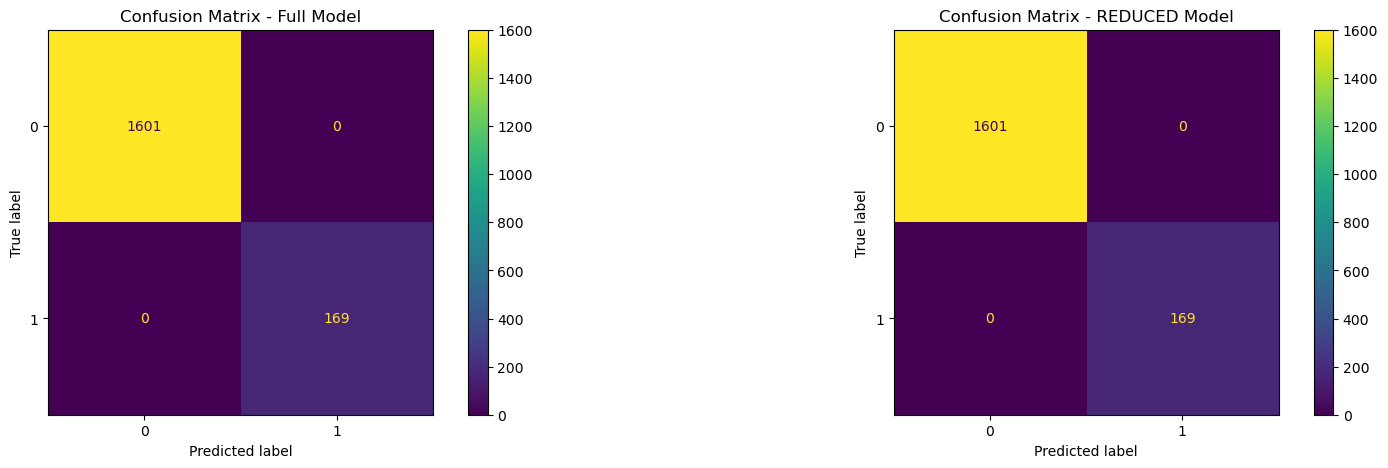

In [23]:
# Use the "try" flow control argument to "try" and generate our confusion matricies
try:

    # Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test) and the predicted labels (y_test_pred) for our full model
    cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

    # Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test1) and the predicted labels (y_test_pred1) for our REDUCED model
    cm1 = confusion_matrix(y_test1, y_pred1, labels=lr1.classes_)

    # Create side-by-side subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Now save the confusion matrix (using ConfusionMatrixDisplay()) of the full model in the "fullDisplay" variable
    fullDisplay = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    # Use the ".plot()" function to store the confusion matrix's graph in the "fullPlot" variable
    fullPlot = fullDisplay.plot(ax=axes[0])
    # Set the title of the confusion matrix for the full model
    fullPlot.ax_.set_title('Confusion Matrix - Full Model')

    # Now save the confusion matrix (using ConfusionMatrixDisplay()) of the REDUCED model in the "reducedDisplay" variable
    reducedDisplay = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=lr1.classes_)
    # Use the ".plot()" function to store the confusion matrix's graph in the "reducedPlot" variable
    reducedPlot = reducedDisplay.plot(ax=axes[1])
    # Set the title of the confusion matrix for the REDUCED model
    reducedPlot.ax_.set_title('Confusion Matrix - REDUCED Model')

    # Display the combined plot
    plt.show()

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Logistic Regression (Full model) AUC score: 1.0

Logistic Regression (REDUCED model) AUC score: 1.0



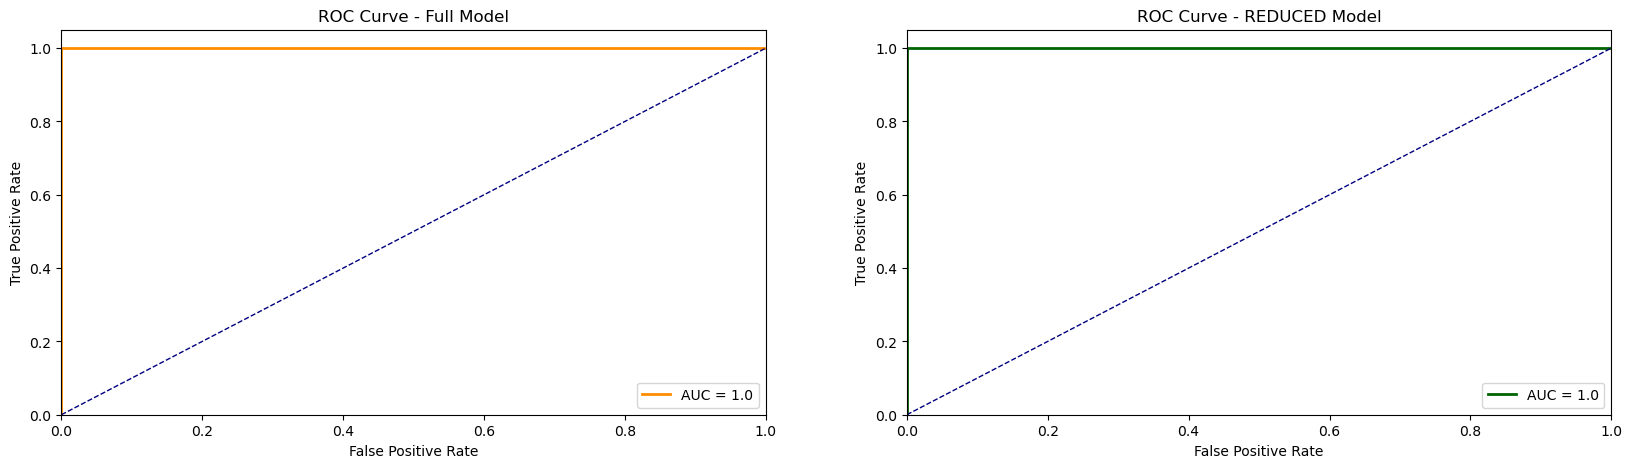

In [24]:
# Use the "try" flow control argument to "try" and generate ROC curves for both LR models
try:
    # Get the probability predictions (not hard class predictions) for the TESTING data (FULL model)
    y_test_proba = lr.predict_proba(X_test)[:, 1]

    # Get the probability predictions for the TESTING data (REDUCED model)
    y_test_proba1 = lr1.predict_proba(X_test1)[:, 1]

    # Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the FULL model
    fpr, tpr, threshold = roc_curve(y_test, y_test_proba)
    # Compute the Area Under the Curve (AUC) score for the FULL model
    roc_auc = auc(fpr, tpr)

    # Print the raw AUC value for logging/analysis
    print('Logistic Regression (Full model) AUC score: ' + str(round(roc_auc, 4)) + '\n')

    # Compute the False Positive Rate (fpr1), True Positive Rate (tpr1), and thresholds for the REDUCED model
    fpr1, tpr1, threshold1 = roc_curve(y_test1, y_test_proba1)
    # Compute the Area Under the Curve (AUC) score for the REDUCED model
    roc_auc1 = auc(fpr1, tpr1)

    # Print the raw AUC value for logging/analysis
    print('Logistic Regression (REDUCED model) AUC score: ' + str(round(roc_auc1, 4)) + '\n')

    # Create side-by-side subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))

    # Plot the ROC curve for the FULL model
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='AUC = ' + str(round(roc_auc, 2)))
    axes[0].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    axes[0].set_xlim([0.0, 1.0])
    axes[0].set_ylim([0.0, 1.05])
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curve - Full Model')
    axes[0].legend(loc='lower right')

    # Plot the ROC curve for the REDUCED model
    axes[1].plot(fpr1, tpr1, color='darkgreen', lw=2, label='AUC = ' + str(round(roc_auc1, 2)))
    axes[1].plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve - REDUCED Model')
    axes[1].legend(loc='lower right')

    # Display the combined ROC plot
    plt.show()

# Handle any errors ('Exceptions') that may occur during prediction or evaluation
except Exception as ex:
    print('Error occurred during ROC curve generation: ' + str(ex))

Logistic Regression (Full) Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):

Scan_Type_PortScan     2.85
Request_Type_Telnet    0.72
Protocol_UDP           0.67
Request_Type_HTTPS     0.28
Port                   0.00
Payload_Size           0.00
Source_IP              0.00
Destination_IP         0.00
Protocol_TCP          -0.10
User_Agent            -0.14
Request_Type_HTTP     -0.21
Request_Type_SSH      -0.21
Request_Type_FTP      -0.22
Request_Type_SMTP     -0.23
Status_Success        -2.46
Scan_Type_Normal      -8.25
dtype: float64

Logistic Regression (REDUCED) Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):

Scan_Type_PortScan      1.35
Request_Type_FTP        0.15
Request_Type_Telnet     0.13
Request_Type_HTTPS      0.09
Request_Type_SSH        0.04
Request_Type_SMTP       0.04
Protocol_UDP           -0.04
User_Agent             -0.06
Request_Type_HTTP      -0.06
Protocol

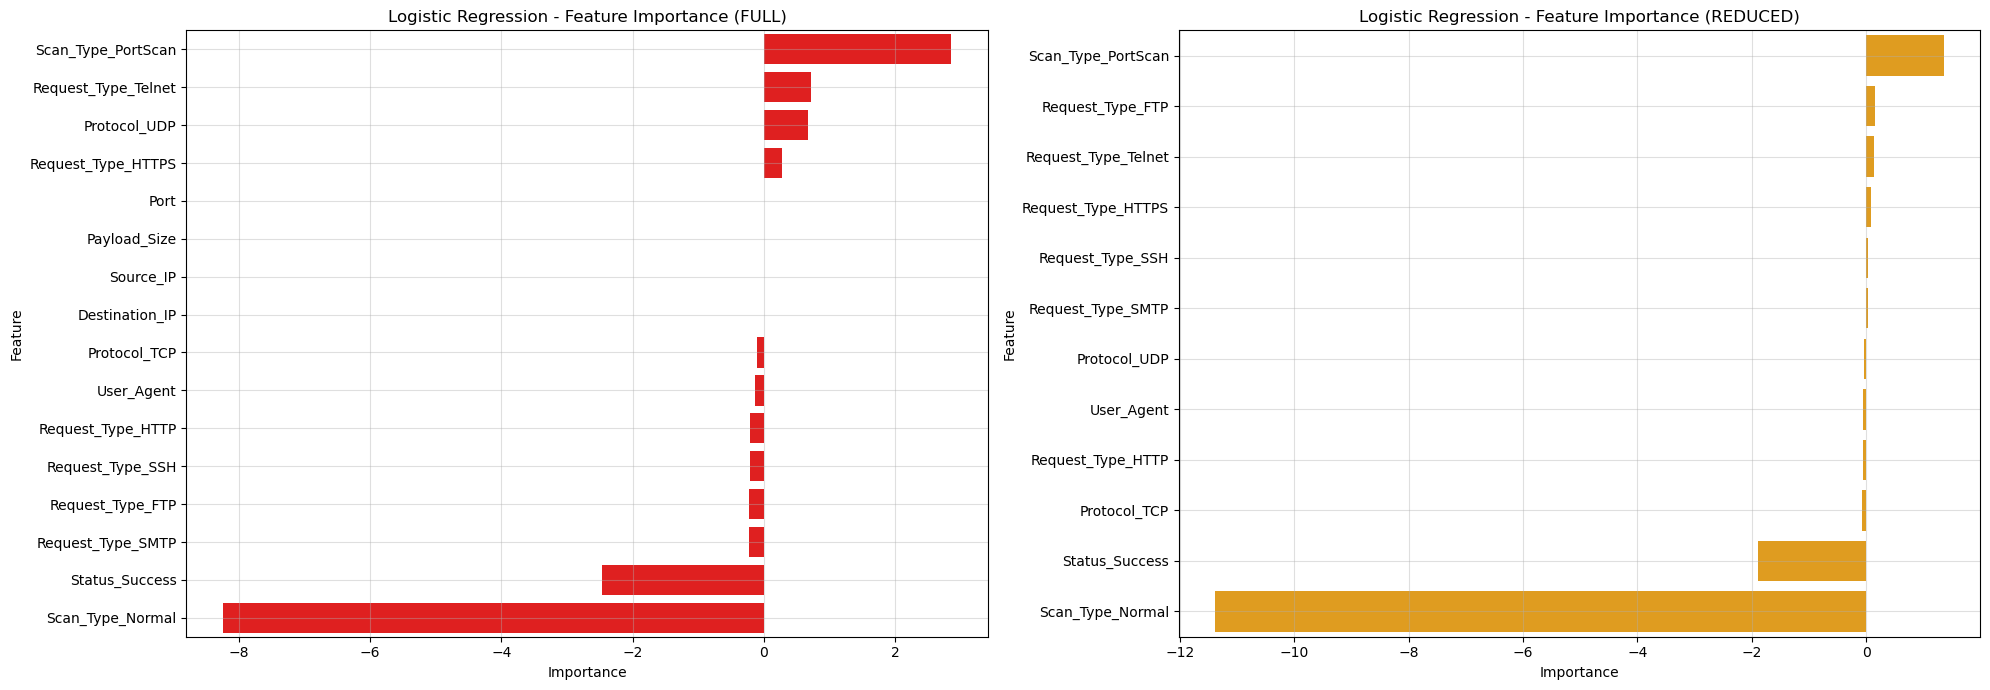

In [25]:
## Get the feature importance from the logistic regression model (FULL)
featureImportance = pd.Series((lr.coef_[0]), index=X_train.columns)

# Get the feature importance from the logistic regression model (REDUCED)
featureImportance1 = pd.Series((lr1.coef_[0]), index=X_train1.columns)

# Sort the "featureImportance" values in descending order (most important feature at the top)
featureImportance.sort_values(ascending=False, inplace=True)

# Sort the "featureImportance1" values in descending order (most important feature at the top)
featureImportance1.sort_values(ascending=False, inplace=True)

# Display top features from FULL model
print('Logistic Regression (Full) Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):' + '\n' + '\n' + str(featureImportance) + '\n')

# Display top features from REDUCED model
print('Logistic Regression (REDUCED) Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):' + '\n' + '\n' + str(featureImportance1) + '\n')

# Create a canvas with the specified "figsize" and 2 horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Use the ".barplot()" function for feature importances on the x-axis, and the var names on the y-axis (FULL model)
sns.barplot(x=featureImportance.values, y=featureImportance.index, color='red', ax=axes[0])

# Set the title of the graph with the ".title()" function (FULL model)
axes[0].set_title('Logistic Regression - Feature Importance (FULL)')
# Set the x-axis label with the ".set_xlabel()" function (FULL model)
axes[0].set_xlabel('Importance')
# Set the y-axis label with the ".set_ylabel()" function (FULL model)
axes[0].set_ylabel('Feature')
# Add a grid to the graph (FULL model)
axes[0].grid(True, alpha=0.4)

# Use the ".barplot()" function for feature importances on the x-axis, and the var names on the y-axis (REDUCED model)
sns.barplot(x=featureImportance1.values, y=featureImportance1.index, color='orange', ax=axes[1])

# Set the title of the graph with the ".title()" function (REDUCED model)
axes[1].set_title('Logistic Regression - Feature Importance (REDUCED)')
# Set the x-axis label with the ".set_xlabel()" function (REDUCED model)
axes[1].set_xlabel('Importance')
# Set the y-axis label with the ".set_ylabel()" function (REDUCED model)
axes[1].set_ylabel('Feature')
# Add a grid to the graph (REDUCED model)
axes[1].grid(True, alpha=0.4)

# Automatically adjust the graphs for much needed spacing
plt.tight_layout()

# Display the graph
plt.show()

**<span style="color:Orange; font-size:18px;">Saving our predictions:</span>**

- Now let's **save our predictions** to a **.csv file** for quick and easy access

In [26]:
# Use the "try" flow control argument to "try" and save our predictions to a csv (FULL MODEL)
try:

    # Create the DataFrame with the prediction data for later merging (FULL MODEL)
    predictionDf = pd.DataFrame({
        'Id': idsTest,                 # To match the rows back to their original records, store the value of the id's from the testing data (idsTest) into a new var called "Id" in the "predictionDf"
        'Predicted Intrusion': y_pred  # Store the model's predictions (y_pred) in "Predicted Intrusion"
    })

    # To decode, loop through each original column that was one-hot encoded - i.e., stored in the "oneHotEncoders" dictionary from earlier
    for col in oneHotEncoders:
        # Retrieve the encoded OneHotEncoder "object" for the column
        encoder = oneHotEncoders[col]
        # Get the category that was dropped during encoding (due to drop='first'), set it equal to "droppedCategory"
        droppedCategory = encoder.categories_[0][0]
        # Get the names of the encoded columns (e.g., ['Protocol_TCP', 'Protocol_UDP']) using the ".get_feature_names_out()" function and store them in a list using the ".tolist()" function
        encodedCols = encoder.get_feature_names_out([col]).tolist()
        # Create a new column using the original name (e.g., 'Protocol'), with all values initially set to the dropped category
        networkData[col] = droppedCategory

        # Now, loop through each encoded column to map 1's back to their respective column
        for encodedColName in encodedCols:
            # Get the category (column) name which corresponds to this encoded column (offset by +1 because of the drop="First")
            matchingColumn = encoder.categories_[0][encodedCols.index(encodedColName) + 1]
            # For rows where the encoded column == 1, assign the correct column name (matchingColumn)
            networkData.loc[networkData[encodedColName] == 1, col] = matchingColumn

    # If the "User_Agent" is in the "labelEncoders" (dictionary)
    if 'User_Agent' in labelEncoders:
        # Use the "try" flow control argument to "try" and inversely transform each "User_Agent" 
        try:
            # Try decoding — will fail if already decoded
            networkData['User_Agent'] = labelEncoders['User_Agent'].inverse_transform(networkData['User_Agent'])
        # Handle any errors (Exceptions) that occur during the ".inverse_transform()" process with our generic error variable 'ex'
        except Exception as ex:
            # Skip decoding if already decoded (or any other issue occurs)
            print('Error: "User_Agents" already decoded! See below:' + '\n' + '\n' + str(ex) + '\n')

    # If the "Source_IP" is in the "labelEncoders" (dictionary)
    if 'Source_IP' in labelEncoders:
        try:
            networkData['Source_IP'] = labelEncoders['Source_IP'].inverse_transform(networkData['Source_IP'])
        except Exception as ex:
            print('Error: "Source_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # If the "Destination_IP" is in the "labelEncoders" (dictionary)
    if 'Destination_IP' in labelEncoders:
        try:
            networkData['Destination_IP'] = labelEncoders['Destination_IP'].inverse_transform(networkData['Destination_IP'])
        except Exception as ex:
            print('Error: "Destination_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # Use a left join to ".merge()" the predictions back to the original dataset "networkData" (which contains Id and all decoded fields)
    results = pd.merge(networkData, predictionDf, on='Id', how='left')

    # Reorder our columns for output
    results = results[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
                       'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion', 'Predicted Intrusion']]

    # Save the resulting DataFrame to a .CSV file
    results.to_csv('networkPredictionsLRFull.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'networkPredictionsLRFull.csv'." + '\n')

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV: " + str(ex))

# Use the "try" flow control argument to "try" and save our predictions to a csv (REDUCED MODEL)
try:
    # Create the DataFrame with the prediction data for later merging (REDUCED MODEL)
    predictionDf1 = pd.DataFrame({
        'Id': idsTest1,                        # To match the rows back to their original records, store the value of the id's from the testing data (idsTest) into a new var called "Id" in the "predictionDf1"
        'Predicted Intrusion': y_pred1         # Store the model's predictions (y_pred1) in "Predicted Intrusion"
    })

    # Use a left join to ".merge()" the predictions back to the original dataset "networkData" (which contains Id and all decoded fields)
    results1 = pd.merge(networkData, predictionDf1, on='Id', how='left')

    # Reorder our columns for output (note: we still include all the same features for readability)
    results1 = results1[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
                         'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion', 'Predicted Intrusion']]

    # Save the resulting DataFrame to a .CSV file
    results1.to_csv('networkPredictionsLRReduced.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'networkPredictionsLRReduced.csv'.")

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV (REDUCED): " + str(ex))

Predictions successfully saved to 'networkPredictionsLRFull.csv'.

Predictions successfully saved to 'networkPredictionsLRReduced.csv'.


**<span style="color:Blue; font-size:18px;">Final Thoughts (Logistic Regression - Full):</span>**

- Our **Logistic Regression model performed well** on both the training and testing datasets, showing **strong predictive power** but **potentially overfitting the data**

- The **confusion matrix** revealed that the model made accurate predictions overall

- Our model has **consistently high rates for both false positive (precision) and false negatives (recall) at < 10%**

- The **roc curve** shows us that the model performs almost perfectly with a **nearly perfect ~1.0 score and hugging of the top of the chart**

- Our **Kappa value** of **just shy of 1.0** tells us that our model has essentially **no random chance** of predicting the values that it did

- The model **consistently scores over 95% accuracy - even with random** (80/20) **partitioning**

*This indicates that the model is reliable and performs consistently across different samples of the data.*

**<span style="color:LightSkyBlue; font-size:18px;">Final Thoughts (Logistic Regression - Reduced):</span>**

- Our **Logistic Regression model (reduced) performed better than the full model** on both training and testing sets, showing **with nearly perfect predictions** - indicating **possible overfitting**

- The **confusion matrix** for both datasets revealed that the model made **extremely** accurate predictions overall

- Our model has **extremely high rates for both false positive (precision) and false negatives (recall) at < 5%**

- The **roc curve** shows us that the **reduced model** performs perfectly with a **nearly ~1.0 score, hugging of the top of the chart**

- Our **Kappa score** of **1.0** tells us that our model has essentially **no random chance** of predicting the values that it did

- The model **consistently scores over 97% accuracy - even with random** (80/20) **partitioning**

*This indicates that the model is reliable and performs consistently across different samples of the data.*

**<span style="color:tan; font-size:18px;">Now it's time to re-process our data for our Discriminant Analysis Model:</span>**

- First, reencode any categorical variables with the encoders ("OneHotEncoder" and "LabelEncoder"), and avoid the dummy variable "trap"

- Second, redefine our feature and target variables

- Then, repartition the dataset into training and testing sets

- Finally, refix the class imbalance for the "Intrusion" variable

In [27]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
networkData = df.copy()

In [28]:
# Create a column that stores a unique ID for record identification
networkData['Id'] = networkData.index + 1

# Reorder the columns with the unique ID column listed first
networkData = networkData[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol', 'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion']]

# Save the Id's for later merging and matching with original data (for final exports)
ids2 = networkData['Id']

# Reset and drop the old index column
networkData = networkData.reset_index(drop=True)

# Display the new columns/data with the new "Id" column now added
display(networkData.head(3))

,Id,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Scan_Type,Intrusion
0,1,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,Normal,0
1,2,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,BotAttack,1
2,3,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,Normal,0


**<span style="color:tan; font-size:18px;">Reencode the non-numeric data:</span>**

In [29]:
# Dummy encode (aka - 'One-hot encode' the 'Request_Type', 'Protocol', 'Status', and 'Scan_Type' columns)
oneHotCols = ['Request_Type', 'Protocol', 'Status', 'Scan_Type']
# Label encode the 'Source_IP' and 'Destination_IP' columns due to high cardinality
labelEncodeCols = ['Source_IP', 'Destination_IP', 'User_Agent']

# Store encoders for future inverse transforms if needed
oneHotEncoders = {}
labelEncoders = {}

# OneHotEncode loop
for col in oneHotCols:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')  # drop the first encoding
    transformed = encoder.fit_transform(networkData[[col]])
    newColNames = encoder.get_feature_names_out([col])
    networkData = networkData.drop(columns=[col])
    networkData[newColNames] = pd.DataFrame(transformed, index=networkData.index)
    oneHotEncoders[col] = encoder

# LabelEncode loop for high-cardinality columns
for col in labelEncodeCols:
    le = LabelEncoder()
    networkData[col] = le.fit_transform(networkData[col])
    labelEncoders[col] = le

# Print a success message for our user
print('Dummies created successfully,' + '\n' + '\n' + 'FIRST five rows of data:' + '\n')
display(networkData.head(3))

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(networkData.tail(3))

Dummies created successfully,

FIRST five rows of data:



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
0,1,1471,7335,80,2369,3,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
1,2,7561,8727,135,1536,2,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,3,955,8069,21,1183,2,0,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00



LAST five rows of data: 



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
8843,8844,3317,5829,443,518,4,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
8844,8845,285,4098,53,1149,0,0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
8845,8846,7553,2684,31337,12,5,1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


**<span style="color:tan; font-size:18px;">Redefine our feature and target variables:</span>**

In [30]:
# Prepare feature variables (Discriminant Analysis model)
X2 = networkData.drop(columns=['Id', 'Intrusion'])

# Prepare the target variable 'Intrusion'
y = networkData[['Intrusion']]

# Print a success message for our user (Discriminant Analysis model)
print('Feature variables:' + '\n' + '\n' + str(X2.columns) + '\n' + '\n' + 'Target variable:' + '\n' + '\n' + str(y.columns) + '\n')

Feature variables:

Index(['Source_IP', 'Destination_IP', 'Port', 'Payload_Size', 'User_Agent', 'Request_Type_FTP', 'Request_Type_HTTP', 'Request_Type_HTTPS', 'Request_Type_SMTP', 'Request_Type_SSH', 'Request_Type_Telnet', 'Protocol_TCP', 'Protocol_UDP', 'Status_Success', 'Scan_Type_Normal', 'Scan_Type_PortScan'], dtype='object')

Target variable:

Index(['Intrusion'], dtype='object')



**<span style="color:tan; font-size:18px;">Repartition the data:</span>**

In [31]:
# Partition the dataset (networkData) into 80% training and 20% testing sets, use the "stratify" param to ensure an equal ratio of the "y" class ("Intrusion" in this case) in each set
X_train2, X_test2, y_train2, y_test2, idsTrain2, idsTest2 = train_test_split(X2, y, ids, test_size=0.2, stratify=y)

# Print a success message for our user and view the shape of the (now partitioned) data
print('Data successfully partitioned.' + '\n' + '\n' + 'Discriminant Analysis training shape:' + '\n' + '(Rows, Columns)' + '\n' + '\n' + 'X Features:' + '\n' + str(X_train2.shape) + '\n' + '\n' + 'Y (target) feature:' + '\n' + str(y_train2.shape) + '\n')

Data successfully partitioned.

Discriminant Analysis training shape:
(Rows, Columns)

X Features:
(7076, 16)

Y (target) feature:
(7076, 1)



**<span style="color:tan; font-size:18px;">Readdress the class imbalance of the target variable by using the SMOTE oversampling technique:</span>**

In [32]:
# Instantiate the SMOTE oversampler object with default settings
smote2 = SMOTE()

# Fit the SMOTE oversampling technique to the training data (**NOT testing, to avoid memorization**) to balance the minority class of the target variable (to balance the amount of 0's vs 1's)
X_train2, y_train2 = smote2.fit_resample(X_train2, y_train2)

# Restore y_train2 to a flat, "pandas series"
y_train2 = pd.Series(y_train2.values.ravel(), name='Intrusion')

# Print success message confirming new class distribution
print('SMOTE successfully applied to training data of the Discriminant Analysis model.' + '\n' + '\n' + 'New class distribution:' + '\n' + '\n' + str(y_train2.value_counts()) + '\n')

SMOTE successfully applied to training data of the Discriminant Analysis model.

New class distribution:

Intrusion
0    6399
1    6399
Name: count, dtype: int64



**<span style="color:tan; font-size:18px;">Now it's time to build our Discriminant Analysis model:</span>**

- First, let's reselect our features for the model

- Then, initialize our Discriminant Analysis model

- Next, fit the model to our data

- Finally, let's investigate which features are our most important predictors for the model

In [33]:
#  Use the "try" flow control argument to "try" and create our model
try:
    # Initialize the Discriminant Analysis model
    da = LinearDiscriminantAnalysis()

    # Train (fit) the model to the training data
    da.fit(X_train2, y_train2)

    # Print a success message for our user
    print("The Discriminant Analysis model has been successfully trained." + '\n')

# Handle any errors (exceptions) that might occur with our generic exception variable 'ex' 
except Exception as ex:
    print('Error occurred while training the model: ' + str(ex))

The Discriminant Analysis model has been successfully trained.



**<span style="color:tan; font-size:18px;">Finally, let's evaluate our Discriminant Analysis model:</span>**

- First, let's examine the **accuracy score** *(% of correct vs incorrect predictions)*

- Second, let's check out the **classification report** *(precision, accuracy, recall, and F-1 score)*

- Next, we’ll compute **Cohen’s Kappa Score** to see how much of our model’s accuracy is what could have happened by random chance (1.0 = perfect, no random chance - 0 = predictions are essentially random guessing).

- Then, we’ll use the **ROC curve and AUC** to see **how well the model balances separating intrusions from non-intrusions - avoiding false alarms** (1.0 = perfect separation, 0.5 = no ability to tell, 0 = perfectly wrong - opposite).

- After creating our classification report, we can **visualize our models performance** on different classes with a **confusion matrix** *(for both training and testing datasets)*

In [34]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred2 = da.predict(X_test2)

    # Calculate the accuracy of our model, storing it in our new variable 'accuracy' (applying the accuracy_score function to our testing set)
    accuracy2 = accuracy_score(y_test2, y_pred2)

    # Print the accuracy score for the Discriminant Analysis model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('Discriminant Analysis - Model Accuracy: ' + '{:.4f}'.format(accuracy2))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Discriminant Analysis - Model Accuracy: 0.9424


In [35]:
# Use the "try" flow control argument to "try" and generate predictions
try:

    # Print a detailed classification report
    print('\n' + 'Discriminant Analysis - Classification Report:' + '\n' + '\n', classification_report(y_test2, y_pred2))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))


Discriminant Analysis - Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1601
           1       0.64      0.89      0.75       169

    accuracy                           0.94      1770
   macro avg       0.82      0.92      0.86      1770
weighted avg       0.95      0.94      0.95      1770



In [36]:
# Calculate Cohen's Kappa Score (full model)
kappa_score2 = cohen_kappa_score(y_test2, y_pred2)

# Print the result
print('Cohen’s Kappa Score (Discriminant Analysis Model): ' + str(round(kappa_score2, 3)))

Cohen’s Kappa Score (Discriminant Analysis Model): 0.715


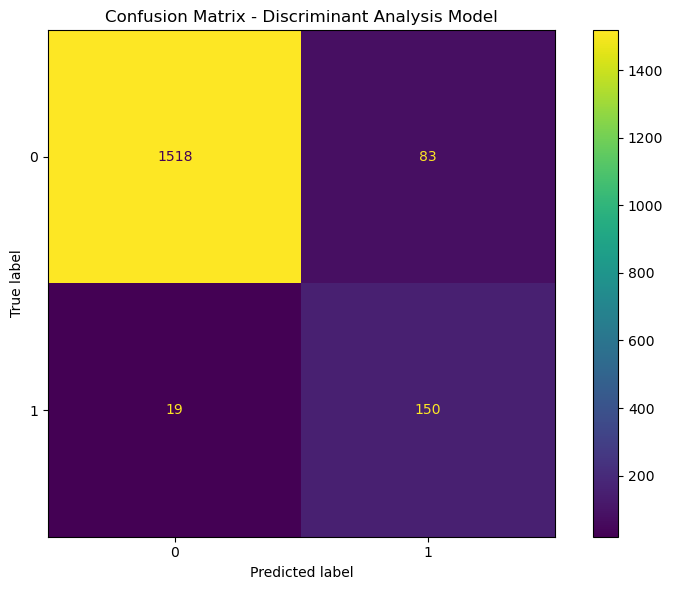

In [37]:
# Use the "try" flow control argument to "try" and generate our confusion matricies
try:

    # Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test2) and the predicted labels (y_pred2)
    cm2 = confusion_matrix(y_test2, y_pred2, labels=da.classes_)

    # Create a figure with a single axis (fix, ax)
    fig, ax = plt.subplots(figsize=(8, 6))

    # Generate the confusion matrix display using the provided confusion matrix and labels
    displaycm = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=da.classes_)

    # Plot the confusion matrix on the single axis
    displaycm.plot(ax=ax)

    # Set the title
    ax.set_title('Confusion Matrix - Discriminant Analysis Model')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Discriminant Analysis AUC score: 0.9755



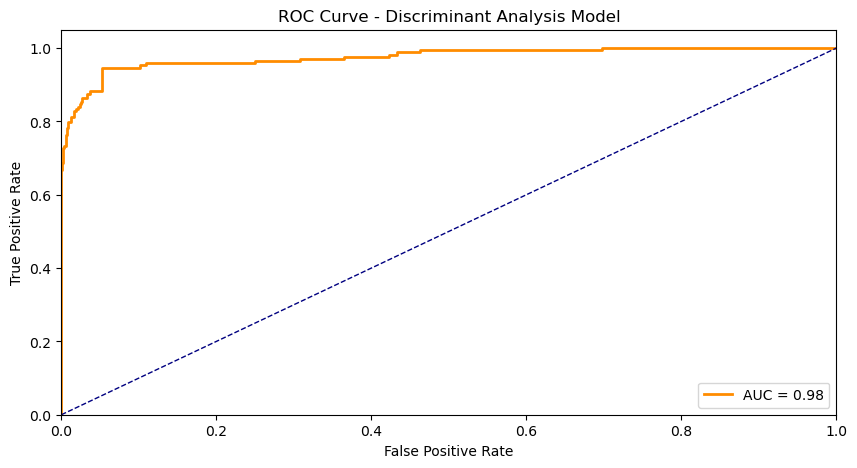

In [38]:
# Use the "try" flow control argument to "try" and generate ROC curve for the Discriminant Analysis model
try:
    # Get the probability predictions (not hard class predictions) for the TESTING data
    y_test_proba2 = da.predict_proba(X_test2)[:, 1]

    # Compute the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
    fpr2, tpr2, threshold2 = roc_curve(y_test2, y_test_proba2)

    # Compute the Area Under the Curve (AUC) score
    roc_auc2 = auc(fpr2, tpr2)

    # Print the raw AUC value for logging/analysis
    print('Discriminant Analysis AUC score: ' + str(round(roc_auc2, 4)) + '\n')

    # Create a single axis plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the ROC curve
    ax.plot(fpr2, tpr2, color='darkorange', lw=2, label='AUC = ' + str(round(roc_auc2, 2)))
    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - Discriminant Analysis Model')
    ax.legend(loc='lower right')

    # Display the ROC plot
    plt.show()

# Handle any errors that occur during prediction or ROC curve generation
except Exception as ex:
    print('Error occurred during ROC curve generation: ' + str(ex))

Discriminant Analysis Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):

Scan_Type_PortScan      5.21
Request_Type_FTP        0.18
Protocol_UDP            0.07
Payload_Size            0.00
Source_IP               0.00
Port                    0.00
Destination_IP          0.00
Scan_Type_Normal        0.00
Request_Type_SMTP      -0.01
Protocol_TCP           -0.06
Request_Type_Telnet    -0.12
User_Agent             -0.15
Request_Type_SSH       -0.16
Request_Type_HTTPS     -0.19
Request_Type_HTTP      -0.47
Status_Success        -11.47
dtype: float64



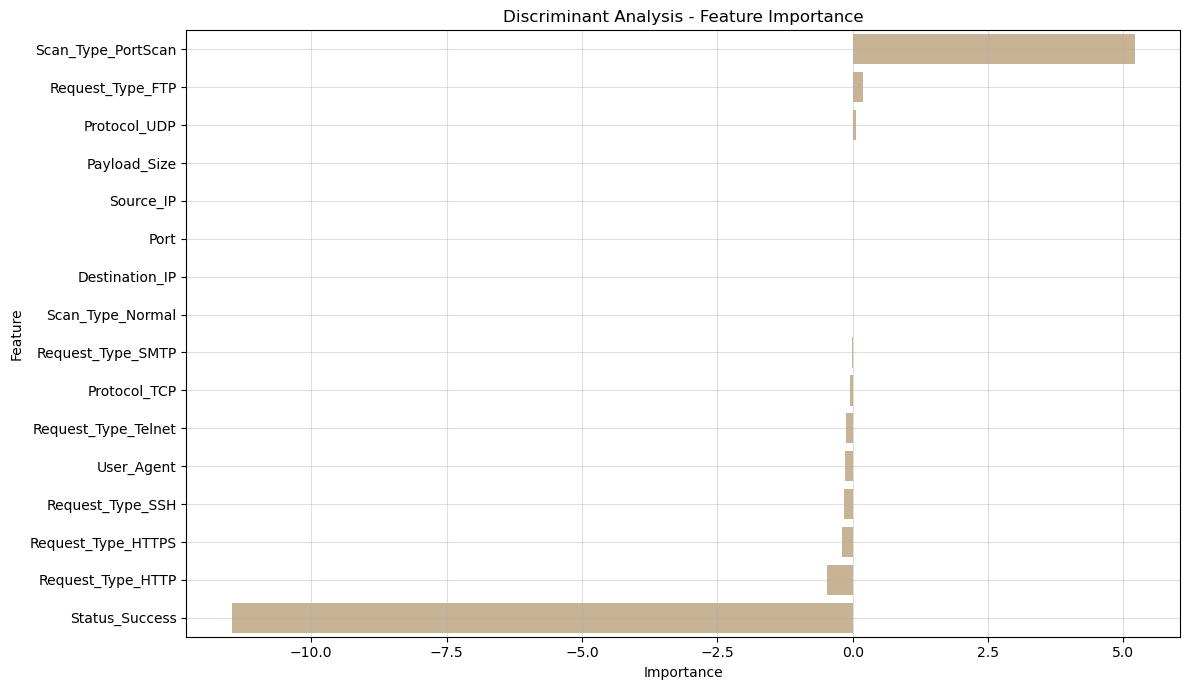

In [39]:
# Get the feature importance from the Discriminant Analysis model
featureImportance2 = pd.Series(da.coef_[0], index=X_train2.columns)

# Sort the features by importance (descending)
featureImportance2.sort_values(ascending=False, inplace=True)

# Display feature importance in text
print('Discriminant Analysis Coefficients (odds of predicting an intrusion — positive values = more likely, negative = less likely):' + '\n' + '\n' + str(featureImportance2) + '\n')

# Create a canvas for the single chart
plt.figure(figsize=(12, 7))

# Use seaborn to create a horizontal barplot
sns.barplot(x=featureImportance2.values, y=featureImportance2.index, color='tan')

# Set chart title and axis labels
plt.title('Discriminant Analysis - Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Enable the grid
plt.grid(True, alpha=0.4)

# Adjust layout
plt.tight_layout()

# Display the chart
plt.show()

**<span style="color:tan; font-size:18px;">Saving our predictions:</span>**

- Now let's **save our predictions** to a **.csv file** for quick and easy access

In [40]:
# Use the "try" flow control argument to "try" and save our predictions to a csv (FULL MODEL)
try:
    # Create the DataFrame with the prediction data for later merging (FULL MODEL)
    predictionDf2 = pd.DataFrame({
        'Id': idsTest2,                 # To match the rows back to their original records, store the value of the id's from the testing data (idsTest2) into a new var called "Id" in the "predictionDf2"
        'Predicted Intrusion': y_pred2  # Store the model's predictions (y_pred) in "Predicted Intrusion"
    })

    # To decode, loop through each original column that was one-hot encoded - i.e., stored in the "oneHotEncoders" dictionary from earlier
    for col in oneHotEncoders:
        # Retrieve the encoded OneHotEncoder "object" for the column
        encoder = oneHotEncoders[col]
        # Get the category that was dropped during encoding (due to drop='first'), set it equal to "droppedCategory"
        droppedCategory = encoder.categories_[0][0]
        # Get the names of the encoded columns (e.g., ['Protocol_TCP', 'Protocol_UDP']) using the ".get_feature_names_out()" function and store them in a list using the ".tolist()" function
        encodedCols = encoder.get_feature_names_out([col]).tolist()
        # Create a new column using the original name (e.g., 'Protocol'), with all values initially set to the dropped category
        networkData[col] = droppedCategory

        # Now, loop through each encoded column to map 1's back to their respective column
        for encodedColName in encodedCols:
            # Get the category (column) name which corresponds to this encoded column (offset by +1 because of the drop="First")
            matchingColumn = encoder.categories_[0][encodedCols.index(encodedColName) + 1]
            # For rows where the encoded column == 1, assign the correct column name (matchingColumn)
            networkData.loc[networkData[encodedColName] == 1, col] = matchingColumn

    # If the "User_Agent" is in the "labelEncoders" (dictionary)
    if 'User_Agent' in labelEncoders:
        # Use the "try" flow control argument to "try" and inversely transform each "User_Agent" 
        try:
            # Try decoding — will fail if already decoded
            networkData['User_Agent'] = labelEncoders['User_Agent'].inverse_transform(networkData['User_Agent'])
        # Handle any errors (Exceptions) that occur during the ".inverse_transform()" process with our generic error variable 'ex'
        except Exception as ex:
            # Skip decoding if already decoded (or any other issue occurs)
            print('Error: "User_Agents" already decoded! See below:' + '\n' + '\n' + str(ex) + '\n')

    # If the "Source_IP" is in the "labelEncoders" (dictionary)
    if 'Source_IP' in labelEncoders:
        try:
            networkData['Source_IP'] = labelEncoders['Source_IP'].inverse_transform(networkData['Source_IP'])
        except Exception as ex:
            print('Error: "Source_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # If the "Destination_IP" is in the "labelEncoders" (dictionary)
    if 'Destination_IP' in labelEncoders:
        try:
            networkData['Destination_IP'] = labelEncoders['Destination_IP'].inverse_transform(networkData['Destination_IP'])
        except Exception as ex:
            print('Error: "Destination_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # Use a left join to ".merge()" the predictions back to the original dataset "networkData" (which contains Id and all decoded fields)
    results2 = pd.merge(networkData, predictionDf2, on='Id', how='left')

    # Reorder our columns for output
    results2 = results2[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
                       'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion', 'Predicted Intrusion']]

    # Save the resulting DataFrame to a .CSV file
    results2.to_csv('networkPredictionsDA.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'networkPredictionsDAFull.csv'.")

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV: " + str(ex))

Predictions successfully saved to 'networkPredictionsDAFull.csv'.


**<span style="color:tan; font-size:18px;">Final Thoughts (Discriminant Analysis):</span>**

- Our **Discriminant Analysis model** performed well on both the training and testing datasets, showing **strong predictive power without significant overfitting**

- The **confusion matrix** revealed that the model made accurate predictions overall

- Our model has **consistently high rates for both false positive (precision) and false negatives (recall) at > 95%**

- The **ROC curve** shows us that the model performs very well with an **AUC score of ~0.96, as the graph starts to hug the top of the chart**

- Our model has a **kappa score of rougly ~70%** (fluctuates due to random partitioning), indicating that **our model's predictions are substantially more accurate than by just by random chance** 

- The model **consistently scores over 90% accuracy - even with random** (80/20) **partitioning**

*This indicates that the model is reliable and performs consistently across different samples of the data.*

In conclusion, the **Discriminant Analysis model did not perform as well as the Logsitic Regression models did**, perhaps reducing some features (Source_IP, Port, etc.) would help performance.

**<span style="color:salmon; font-size:18px;">Now it's time to re-process our data for our Multilayer Perceptron (MLP) Neural Network Model:</span>**

- First, reencode any categorical variables with the encoders ("OneHotEncoder" and "LabelEncoder"), and avoid the dummy variable "trap"

- Second, redefine our feature and target variables

- Then, repartition the dataset into training and testing sets

- Finally, refix the class imbalance for the "Intrusion" variable

In [41]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
networkData = df.copy()

In [42]:
# Create a column that stores a unique ID for record identification
networkData['Id'] = networkData.index + 1

# Reorder the columns with the unique ID column listed first
networkData = networkData[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol', 'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion']]

# Save the Id's for later merging and matching with original data (for final exports)
ids = networkData['Id']

# Reset and drop the old index column
networkData = networkData.reset_index(drop=True)

# Display the new columns/data with the new "Id" column now added
display(networkData.head(3))

,Id,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Scan_Type,Intrusion
0,1,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,Normal,0
1,2,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,BotAttack,1
2,3,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,Normal,0


**<span style="color:salmon; font-size:18px;">Reencode the non-numeric data:</span>**

In [43]:
# Dummy encode (aka - 'One-hot encode' the 'Request_Type', 'Protocol', 'Status', and 'Scan_Type' columns)
oneHotCols = ['Request_Type', 'Protocol', 'Status', 'Scan_Type']
# Label encode the 'Source_IP' and 'Destination_IP' columns due to high cardinality
labelEncodeCols = ['Source_IP', 'Destination_IP', 'User_Agent']

# Store encoders for future inverse transforms if needed
oneHotEncoders = {}
labelEncoders = {}

# OneHotEncode loop
for col in oneHotCols:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')  # drop the first encoding
    transformed = encoder.fit_transform(networkData[[col]])
    newColNames = encoder.get_feature_names_out([col])
    networkData = networkData.drop(columns=[col])
    networkData[newColNames] = pd.DataFrame(transformed, index=networkData.index)
    oneHotEncoders[col] = encoder

# LabelEncode loop for high-cardinality columns
for col in labelEncodeCols:
    le = LabelEncoder()
    networkData[col] = le.fit_transform(networkData[col])
    labelEncoders[col] = le

# Print a success message for our user
print('Dummies created successfully,' + '\n' + '\n' + 'FIRST five rows of data:' + '\n')
display(networkData.head(3))

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(networkData.tail(3))

Dummies created successfully,

FIRST five rows of data:



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
0,1,1471,7335,80,2369,3,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
1,2,7561,8727,135,1536,2,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,3,955,8069,21,1183,2,0,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00



LAST five rows of data: 



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
8843,8844,3317,5829,443,518,4,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
8844,8845,285,4098,53,1149,0,0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
8845,8846,7553,2684,31337,12,5,1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


**<span style="color:salmon; font-size:18px;">Redefine our feature and target variables:</span>**

In [44]:
# Prepare feature variables (MLP Neural Network model)
X3 = networkData.drop(columns=['Id', 'Intrusion'])

# Prepare the target variable 'Intrusion'
y = networkData[['Intrusion']]

# Print a success message for our user
print('Feature variables:' + '\n' + '\n' + str(X3.columns) + '\n' + '\n' + 'Target variable:' + '\n' + '\n' + str(y.columns) + '\n')

Feature variables:

Index(['Source_IP', 'Destination_IP', 'Port', 'Payload_Size', 'User_Agent', 'Request_Type_FTP', 'Request_Type_HTTP', 'Request_Type_HTTPS', 'Request_Type_SMTP', 'Request_Type_SSH', 'Request_Type_Telnet', 'Protocol_TCP', 'Protocol_UDP', 'Status_Success', 'Scan_Type_Normal', 'Scan_Type_PortScan'], dtype='object')

Target variable:

Index(['Intrusion'], dtype='object')



**<span style="color:salmon; font-size:18px;">Repartition the data:</span>**

In [45]:
# Partition the dataset (networkData) into 80% training and 20% testing sets, use the "stratify" param to ensure an equal ratio of the "y" class ("Intrusion" in this case) in each set
X_train3, X_test3, y_train3, y_test3, idsTrain3, idsTest3 = train_test_split(X3, y, ids, test_size=0.2, stratify=y)

# Print a success message for our user and view the shape of the (now partitioned) data
print('Data successfully partitioned.' + '\n' + '\n' + 'MLP Neural Network training shape:' + '\n' + '(Rows, Columns)' + '\n' + '\n' + 'X Features:' + '\n' + str(X_train3.shape) + '\n' + '\n' + 'Y (target) feature:' + '\n' + str(y_train3.shape) + '\n')

Data successfully partitioned.

MLP Neural Network training shape:
(Rows, Columns)

X Features:
(7076, 16)

Y (target) feature:
(7076, 1)



**<span style="color:salmon; font-size:18px;">Readdress the class imbalance of the target variable by using the SMOTE oversampling technique:</span>**

In [46]:
# Instantiate the SMOTE oversampler object with default settings
smote3 = SMOTE()

# Fit the SMOTE oversampling technique to the training data (**NOT testing, to avoid memorization**) to balance the minority class of the target variable (to balance the amount of 0's vs 1's)
X_train3, y_train3 = smote3.fit_resample(X_train3, y_train3)

# Restore y_train3 to a flat, "pandas series"
y_train3 = pd.Series(y_train3.values.ravel(), name='Intrusion')

# Print success message confirming new class distribution
print('SMOTE successfully applied to training data of the MLP Neural Network model.' + '\n' + '\n' + 'New class distribution:' + '\n' + '\n' + str(y_train3.value_counts()) + '\n')

SMOTE successfully applied to training data of the MLP Neural Network model.

New class distribution:

Intrusion
0    6399
1    6399
Name: count, dtype: int64



**<span style="color:salmon; font-size:18px;">Now it's time to build our MLP Neural Network model:</span>**

- First, let's reselect our features for the model

- Then, initialize our MLP model

- Next, fit the model to our data

- Finally, let's investigate which features are our most important predictors for the model (using "permuation_importance" instead of just coefficients - since NN's aren't linear)

In [47]:
#  Use the "try" flow control argument to "try" and create our model
try:
    # Initialize the Multilayer Perceptron (MLP) Neural Network model
    mlpNN = MLPClassifier(early_stopping=True)

    # Train (fit) the model to the training data
    mlpNN.fit(X_train3, y_train3)

    # Print a success message for our user
    print("The MLP Neural Network model has been successfully trained." + '\n')

# Handle any errors (exceptions) that might occur with our generic exception variable 'ex' 
except Exception as ex:
    print('Error occurred while training the model: ' + str(ex) + '\n')

The MLP Neural Network model has been successfully trained.



**<span style="color:salmon; font-size:18px;">Finally, let's evaluate our MLP Neural Network model:</span>**

- First, let's examine the **accuracy score** *(% of correct vs incorrect predictions)*

- Second, let's check out the **classification report** *(precision, accuracy, recall, and F-1 score)*

- Next, we’ll compute **Cohen’s Kappa Score** to see how much of our model’s accuracy is what could have happened by random chance (1.0 = perfect, no random chance - 0 = predictions are essentially random guessing).

- Then, we’ll use the **ROC curve and AUC** to see **how well the model balances separating intrusions from non-intrusions - avoiding false alarms** (1.0 = perfect separation, 0.5 = no ability to tell, 0 = perfectly wrong - opposite).

- After creating our classification report, we can **visualize our models performance** on different classes with a **confusion matrix** *(for both training and testing datasets)*

In [48]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred3 = mlpNN.predict(X_test3)

    # Calculate the accuracy of our model, storing it in our new variable 'accuracy3' (applying the accuracy_score function to our testing set)
    accuracy3 = accuracy_score(y_test3, y_pred3)

    # Print the accuracy score for the MLP Neural Network model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('MLP Neural Network - Model Accuracy: ' + '{:.4f}'.format(accuracy3))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

MLP Neural Network - Model Accuracy: 0.9836


In [49]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Print a detailed classification report
    print('\n' + 'MLP Neural Network - Classification Report:' + '\n' + '\n', classification_report(y_test3, y_pred3))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))


MLP Neural Network - Classification Report:

               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1601
           1       0.92      0.91      0.91       169

    accuracy                           0.98      1770
   macro avg       0.95      0.95      0.95      1770
weighted avg       0.98      0.98      0.98      1770



In [50]:
# Calculate Cohen's Kappa Score
kappa_score3 = cohen_kappa_score(y_test3, y_pred3)

# Print the result
print('Cohen’s Kappa Score (MLP Neural Network Model): ' + str(round(kappa_score3, 3)))

Cohen’s Kappa Score (MLP Neural Network Model): 0.905


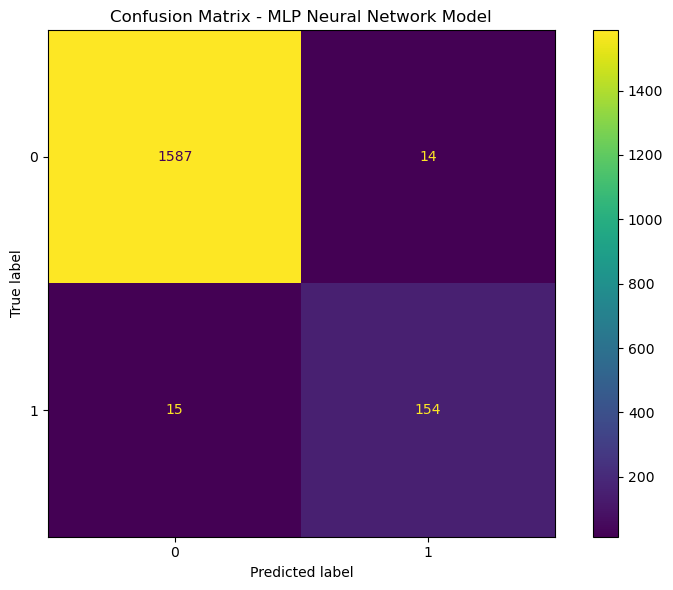

In [51]:
# Use the "try" flow control argument to "try" and generate our confusion matricies
try:
    # Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test3) and the predicted labels (y_pred3)
    cm3 = confusion_matrix(y_test3, y_pred3, labels=mlpNN.classes_)

    # Create a figure with a single axis (fix, ax)
    fig, ax = plt.subplots(figsize=(8, 6))

    # Generate the confusion matrix display using the provided confusion matrix and labels
    displaycm = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=mlpNN.classes_)

    # Plot the confusion matrix on the single axis
    displaycm.plot(ax=ax)

    # Set the title
    ax.set_title('Confusion Matrix - MLP Neural Network Model')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

MLP Neural Network AUC score: 0.9916



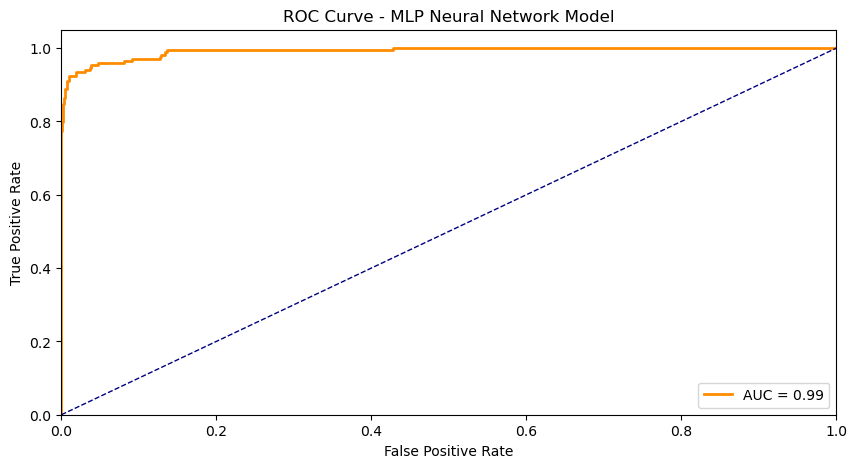

In [52]:
# Use the "try" flow control argument to "try" and generate ROC curve for the Discriminant Analysis model
try:
    # Get the probability predictions (not hard class predictions) for the TESTING data
    y_test_proba3 = mlpNN.predict_proba(X_test3)[:, 1]

    # Compute the False Positive Rate (fpr3), True Positive Rate (tpr3), and thresholds
    fpr3, tpr3, threshold3 = roc_curve(y_test3, y_test_proba3)

    # Compute the Area Under the Curve (AUC) score
    roc_auc3 = auc(fpr3, tpr3)

    # Print the raw AUC value for logging/analysis
    print('MLP Neural Network AUC score: ' + str(round(roc_auc3, 4)) + '\n')

    # Create a single axis plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the ROC curve
    ax.plot(fpr3, tpr3, color='darkorange', lw=2, label='AUC = ' + str(round(roc_auc3, 2)))
    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - MLP Neural Network Model')
    ax.legend(loc='lower right')

    # Display the ROC plot
    plt.show()

# Handle any errors that occur during prediction or ROC curve generation
except Exception as ex:
    print('Error occurred during ROC curve generation: ' + str(ex))

MLP Neural Network Model - Permutation Importances (Higher = More Important):

Port                   0.07
Source_IP              0.02
Scan_Type_Normal       0.01
Payload_Size           0.01
Status_Success         0.01
User_Agent             0.00
Scan_Type_PortScan     0.00
Destination_IP         0.00
Request_Type_HTTPS     0.00
Protocol_TCP           0.00
Request_Type_Telnet    0.00
Request_Type_SSH      -0.00
Request_Type_FTP      -0.00
Request_Type_SMTP     -0.00
Protocol_UDP          -0.00
Request_Type_HTTP     -0.00
dtype: float64



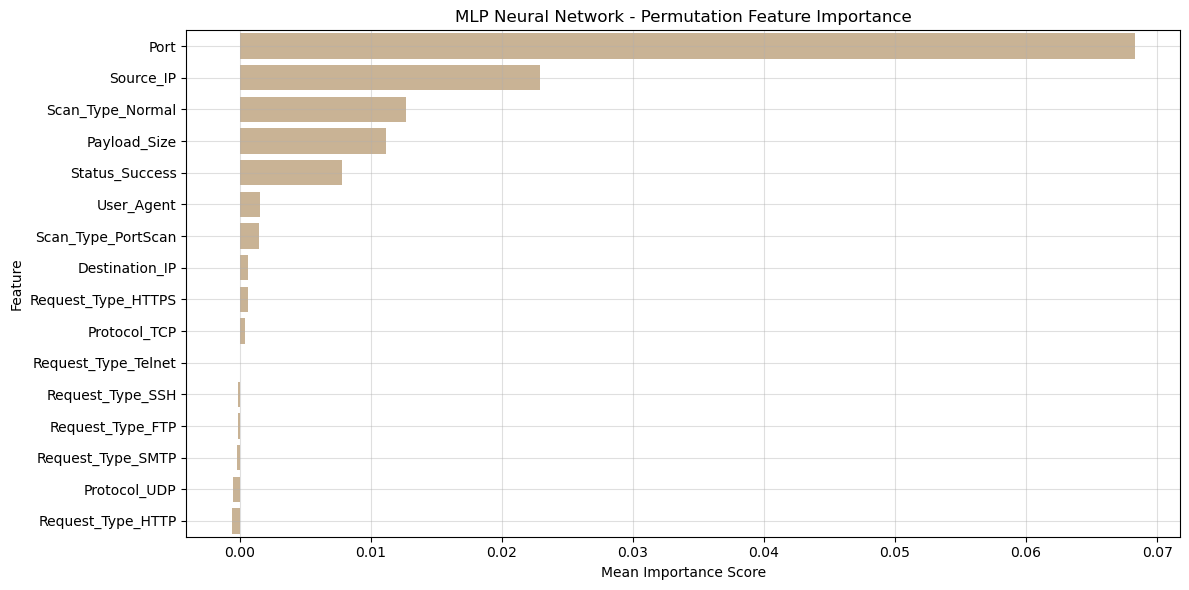

In [53]:
# Run permutation importance on the MLP model
result = permutation_importance(mlpNN, X_test3, y_test3, n_repeats=50, scoring='accuracy')

# Put the permutation importance results into a series
permImportance = pd.Series(result.importances_mean, index=X_train3.columns)

# Sort the output in descending order (largest ---> smallest)
permImportance.sort_values(ascending=False, inplace=True)

# Print out a verification statement for our user
print('MLP Neural Network Model - Permutation Importances (Higher = More Important):' + '\n' + '\n' + str(permImportance) + '\n')

# Initialize the plot with a (figsize=(12,7))
plt.figure(figsize=(12, 6))
# Set the plot as a 'barplot' with x-axis as the permmutation importance values (.values) and the y-axis as the permutation importance indices (.index)
sns.barplot(x=permImportance.values, y=permImportance.index, color='tan')
plt.title('MLP Neural Network - Permutation Feature Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.grid(True, alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()

**<span style="color:salmon; font-size:18px;">Saving our predictions:</span>**

- Now let's **save our predictions** to a **.csv file** for quick and easy access

In [54]:
# Use the "try" flow control argument to "try" and save our predictions to a csv (MLP MODEL)
try:
    # Create the DataFrame with the prediction data for later merging (MLP MODEL)
    predictionDf3 = pd.DataFrame({
        'Id': idsTest3,                 # To match the rows back to their original records, store the value of the id's from the testing data (idsTest3) into a new var called "Id" in the "predictionDf3"
        'Predicted Intrusion': y_pred3  # Store the model's predictions (y_pred3) in "Predicted Intrusion"
    })

    # To decode, loop through each original column that was one-hot encoded - i.e., stored in the "oneHotEncoders" dictionary from earlier
    for col in oneHotEncoders:
        # Retrieve the encoded OneHotEncoder "object" for the column
        encoder = oneHotEncoders[col]
        # Get the category that was dropped during encoding (due to drop='first'), set it equal to "droppedCategory"
        droppedCategory = encoder.categories_[0][0]
        # Get the names of the encoded columns (e.g., ['Protocol_TCP', 'Protocol_UDP']) using the ".get_feature_names_out()" function and store them in a list using the ".tolist()" function
        encodedCols = encoder.get_feature_names_out([col]).tolist()
        # Create a new column using the original name (e.g., 'Protocol'), with all values initially set to the dropped category
        networkData[col] = droppedCategory

        # Now, loop through each encoded column to map 1's back to their respective column
        for encodedColName in encodedCols:
            # Get the category (column) name which corresponds to this encoded column (offset by +1 because of the drop="First")
            matchingColumn = encoder.categories_[0][encodedCols.index(encodedColName) + 1]
            # For rows where the encoded column == 1, assign the correct column name (matchingColumn)
            networkData.loc[networkData[encodedColName] == 1, col] = matchingColumn

    # If the "User_Agent" is in the "labelEncoders" (dictionary)
    if 'User_Agent' in labelEncoders:
        # Use the "try" flow control argument to "try" and inversely transform each "User_Agent" 
        try:
            # Try decoding — will fail if already decoded
            networkData['User_Agent'] = labelEncoders['User_Agent'].inverse_transform(networkData['User_Agent'])
        # Handle any errors (Exceptions) that occur during the ".inverse_transform()" process with our generic error variable 'ex'
        except Exception as ex:
            # Skip decoding if already decoded (or any other issue occurs)
            print('Error: "User_Agents" already decoded! See below:' + '\n' + '\n' + str(ex) + '\n')

    # If the "Source_IP" is in the "labelEncoders" (dictionary)
    if 'Source_IP' in labelEncoders:
        try:
            networkData['Source_IP'] = labelEncoders['Source_IP'].inverse_transform(networkData['Source_IP'])
        except Exception as ex:
            print('Error: "Source_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # If the "Destination_IP" is in the "labelEncoders" (dictionary)
    if 'Destination_IP' in labelEncoders:
        try:
            networkData['Destination_IP'] = labelEncoders['Destination_IP'].inverse_transform(networkData['Destination_IP'])
        except Exception as ex:
            print('Error: "Destination_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # Use a left join to ".merge()" the predictions back to the original dataset "networkData" (which contains Id and all decoded fields)
    results3 = pd.merge(networkData, predictionDf3, on='Id', how='left')

    # Reorder our columns for output
    results3 = results3[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
                       'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion', 'Predicted Intrusion']]

    # Save the resulting DataFrame to a .CSV file
    results3.to_csv('networkPredictionsMLP.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'networkPredictionsMLP.csv'.")

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV: " + str(ex))

Predictions successfully saved to 'networkPredictionsMLP.csv'.


**<span style="color:salmon; font-size:18px;">Final Thoughts (Multilayer Perceptron (MLP) Neural Network):</span>**

- Our **MLP model** performed well on both the training and testing datasets, showing **strong predictive power without significant overfitting**

- The **confusion matrix** revealed that the model made accurate predictions overall

- Our model has **consistently high rates for both false positive (precision) and false negatives (recall) at > 95%**

- The **ROC curve** shows us that the model performs very well with an **AUC score of ~0.99, as the graph starts and shoots upward toward the top of the chart**

- Our model has a **kappa score of above ~80%** (fluctuates due to random partitioning), indicating that **our model's predictions are substantially more accurate than by just by random chance** 

- The model **consistently scores over 95% accuracy - even with random** (80/20) **partitioning**

*These metrics indicate that the model is very reliable and performs consistently across different samples of the dataset.*

In conclusion, the **MLP model did not perform as well as the Logsitic Regression models did (though performance was not substantially less)** perhaps removing some features (Request_Type_SSH, Request_Type_Telnet) would help performance. It appears that the features may have more linearity than originally suspected and could be why the Logistic Regression models perform so well.

**<span style="color:chocolate; font-size:18px;">Now it's time to re-process our data for our Classification Tree Model:</span>**

- First, reencode any categorical variables with the encoders ("OneHotEncoder" and "LabelEncoder"), and avoid the dummy variable "trap"

- Second, redefine our feature and target variables

- Then, repartition the dataset into training and testing sets

- Finally, refix the class imbalance for the "Intrusion" variable

In [55]:
# Create a copy of the original dataframe to ensure we do not accidentally alter any data
networkData = df.copy()

In [56]:
# Create a column that stores a unique ID for record identification
networkData['Id'] = networkData.index + 1

# Reorder the columns with the unique ID column listed first
networkData = networkData[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol', 'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion']]

# Save the Id's for later merging and matching with original data (for final exports)
ids = networkData['Id']

# Reset and drop the old index column
networkData = networkData.reset_index(drop=True)

# Display the new columns/data with the new "Id" column now added
display(networkData.head(3))

,Id,Source_IP,Destination_IP,Port,Request_Type,Protocol,Payload_Size,User_Agent,Status,Scan_Type,Intrusion
0,1,192.168.142.55,42.156.67.167,80,FTP,UDP,2369,curl/7.68.0,Success,Normal,0
1,2,53.39.165.18,94.60.242.119,135,SMTP,UDP,1536,Wget/1.20.3,Failure,BotAttack,1
2,3,192.168.127.91,7.10.192.3,21,SMTP,TCP,1183,Wget/1.20.3,Success,Normal,0


**<span style="color:chocolate; font-size:18px;">Reencode the non-numeric data:</span>**

In [57]:
# Dummy encode (aka - 'One-hot encode' the 'Request_Type', 'Protocol', 'Status', and 'Scan_Type' columns)
oneHotCols = ['Request_Type', 'Protocol', 'Status', 'Scan_Type']
# Label encode the 'Source_IP' and 'Destination_IP' columns due to high cardinality
labelEncodeCols = ['Source_IP', 'Destination_IP', 'User_Agent']

# Store encoders for future inverse transforms if needed
oneHotEncoders = {}
labelEncoders = {}

# OneHotEncode loop
for col in oneHotCols:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')  # drop the first encoding
    transformed = encoder.fit_transform(networkData[[col]])
    newColNames = encoder.get_feature_names_out([col])
    networkData = networkData.drop(columns=[col])
    networkData[newColNames] = pd.DataFrame(transformed, index=networkData.index)
    oneHotEncoders[col] = encoder

# LabelEncode loop for high-cardinality columns
for col in labelEncodeCols:
    le = LabelEncoder()
    networkData[col] = le.fit_transform(networkData[col])
    labelEncoders[col] = le

# Print a success message for our user
print('Dummies created successfully,' + '\n' + '\n' + 'FIRST five rows of data:' + '\n')
display(networkData.head(3))

# View the LAST five rows of our dataset
print('\n' + 'LAST five rows of data: ' + '\n')
display(networkData.tail(3))

Dummies created successfully,

FIRST five rows of data:



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
0,1,1471,7335,80,2369,3,0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
1,2,7561,8727,135,1536,2,1,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
2,3,955,8069,21,1183,2,0,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00



LAST five rows of data: 



,Id,Source_IP,Destination_IP,Port,Payload_Size,User_Agent,Intrusion,Request_Type_FTP,Request_Type_HTTP,Request_Type_HTTPS,Request_Type_SMTP,Request_Type_SSH,Request_Type_Telnet,Protocol_TCP,Protocol_UDP,Status_Success,Scan_Type_Normal,Scan_Type_PortScan
8843,8844,3317,5829,443,518,4,0,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00
8844,8845,285,4098,53,1149,0,0,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
8845,8846,7553,2684,31337,12,5,1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


**<span style="color:chocolate; font-size:18px;">Redefine our feature and target variables:</span>**

In [58]:
# Prepare feature variables (Classification Tree model)
X4 = networkData.drop(columns=['Id', 'Intrusion'])

# Prepare the target variable 'Intrusion'
y = networkData[['Intrusion']]

# Print a success message for our user (Classification Tree model)
print('Feature variables:' + '\n' + '\n' + str(X4.columns) + '\n' + '\n' + 'Target variable:' + '\n' + '\n' + str(y.columns) + '\n')

Feature variables:

Index(['Source_IP', 'Destination_IP', 'Port', 'Payload_Size', 'User_Agent', 'Request_Type_FTP', 'Request_Type_HTTP', 'Request_Type_HTTPS', 'Request_Type_SMTP', 'Request_Type_SSH', 'Request_Type_Telnet', 'Protocol_TCP', 'Protocol_UDP', 'Status_Success', 'Scan_Type_Normal', 'Scan_Type_PortScan'], dtype='object')

Target variable:

Index(['Intrusion'], dtype='object')



**<span style="color:chocolate; font-size:18px;">Repartition the data:</span>**

In [59]:
# Partition the dataset (networkData) into 80% training and 20% testing sets, use the "stratify" param to ensure an equal ratio of the "y" class ("Intrusion" in this case) in each set
X_train4, X_test4, y_train4, y_test4, idsTrain4, idsTest4 = train_test_split(X4, y, ids, test_size=0.2, stratify=y)

# Print a success message for our user and view the shape of the (now partitioned) data
print('Data successfully partitioned.' + '\n' + '\n' + 'Classification Tree training shape:' + '\n' + '(Rows, Columns)' + '\n' + '\n' + 'X Features:' + '\n' + str(X_train4.shape) + '\n' + '\n' + 'Y (target) feature:' + '\n' + str(y_train4.shape) + '\n')

Data successfully partitioned.

Classification Tree training shape:
(Rows, Columns)

X Features:
(7076, 16)

Y (target) feature:
(7076, 1)



**<span style="color:chocolate; font-size:18px;">Readdress the class imbalance of the target variable by using the SMOTE oversampling technique:</span>**

In [60]:
# Instantiate the SMOTE oversampler object with default settings
smote4 = SMOTE()

# Fit the SMOTE oversampling technique to the training data (**NOT testing, to avoid memorization**) to balance the minority class of the target variable (to balance the amount of 0's vs 1's)
X_train4, y_train4 = smote4.fit_resample(X_train4, y_train4)

# Restore y_train4 to a flat, "pandas series"
y_train4 = pd.Series(y_train4.values.ravel(), name='Intrusion')

# Print success message confirming new class distribution
print('SMOTE successfully applied to training data of the Classification Tree model.' + '\n' + '\n' + 'New class distribution:' + '\n' + '\n' + str(y_train4.value_counts()) + '\n')

SMOTE successfully applied to training data of the Classification Tree model.

New class distribution:

Intrusion
0    6399
1    6399
Name: count, dtype: int64



**<span style="color:chocolate; font-size:18px;">Now it's time to build our Classification Tree model:</span>**

- First, let's reselect our features for the model

- Then, initialize our Classification Tree model

- Next, fit the model to our data

- Finally, let's investigate which features are our most important predictors for the model (using "permuation_importance" instead of just coefficients - since NN's aren't linear)

In [61]:
#  Use the "try" flow control argument to "try" and create our model
try:
    # Initialize the DecisionTreeClassifier model
    classificationTree = DecisionTreeClassifier()

    # Train (fit) the model to the training data
    classificationTree.fit(X_train4, y_train4)

    # Print a success message for our user
    print("The Classification Tree model has been successfully trained." + '\n')

# Handle any errors (exceptions) that might occur with our generic exception variable 'ex' 
except Exception as ex:
    print('Error occurred while training the model: ' + str(ex) + '\n')

The Classification Tree model has been successfully trained.



**<span style="color:chocolate; font-size:18px;">Finally, let's evaluate our Classification Tree model:</span>**

- First, let's examine the **accuracy score** *(% of correct vs incorrect predictions)*

- Second, let's check out the **classification report** *(precision, accuracy, recall, and F-1 score)*

- Next, we’ll compute **Cohen’s Kappa Score** to see how much of our model’s accuracy is what could have happened by random chance (1.0 = perfect, no random chance - 0 = predictions are essentially random guessing).

- Then, we’ll use the **ROC curve and AUC** to see **how well the model balances separating intrusions from non-intrusions - avoiding false alarms** (1.0 = perfect separation, 0.5 = no ability to tell, 0 = perfectly wrong - opposite).

- After creating our classification report, we can **visualize our models performance** on different classes with a **confusion matrix** *(for both training and testing datasets)*

In [62]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Generate predictions using our trained model
    y_pred4 = classificationTree.predict(X_test4)

    # Calculate the accuracy of our model, storing it in our new variable 'accuracy4' (applying the accuracy_score function to our testing set)
    accuracy4 = accuracy_score(y_test4, y_pred4)

    # Print the accuracy score for the Classification Tree model (use '{:.4f}'.format(accuracy) to achieve a 4 decimal place float in the print statement)
    print('Classification Tree - Model Accuracy: ' + '{:.4f}'.format(accuracy4))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Classification Tree - Model Accuracy: 1.0000


In [63]:
# Use the "try" flow control argument to "try" and generate predictions
try:
    # Print a detailed classification report
    print('\n' + 'Classification Tree - Classification Report:' + '\n' + '\n', classification_report(y_test4, y_pred4))

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))


Classification Tree - Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1601
           1       1.00      1.00      1.00       169

    accuracy                           1.00      1770
   macro avg       1.00      1.00      1.00      1770
weighted avg       1.00      1.00      1.00      1770



In [64]:
# Calculate Cohen's Kappa Score
kappa_score4 = cohen_kappa_score(y_test4, y_pred4)

# Print the result
print('Cohen’s Kappa Score (Classification Tree Model): ' + str(round(kappa_score4, 3)))

Cohen’s Kappa Score (Classification Tree Model): 1.0


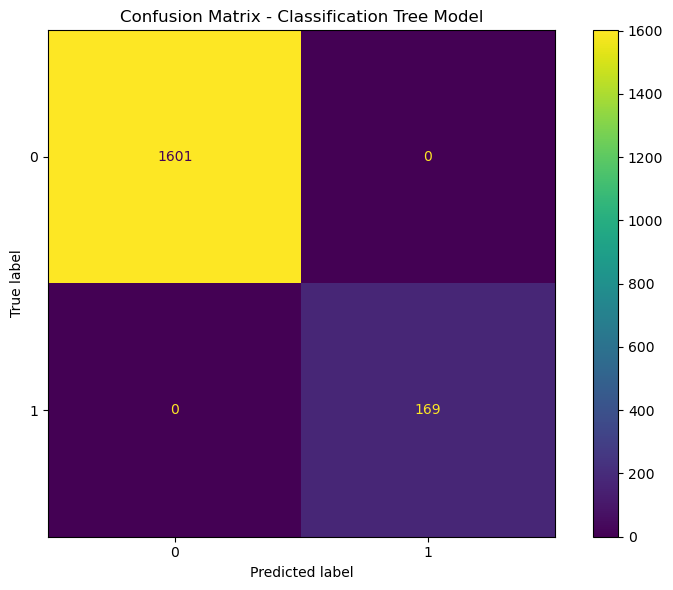

In [65]:
# Use the "try" flow control argument to "try" and generate our confusion matricies
try:
    # Create a confusion matrix (using 'confusion_matrix()'), comparing the true labels (y_test4) and the predicted labels (y_pred4)
    cm4 = confusion_matrix(y_test4, y_pred4, labels=classificationTree.classes_)

    # Create a figure with a single axis (fix, ax)
    fig, ax = plt.subplots(figsize=(8, 6))

    # Generate the confusion matrix display using the provided confusion matrix and labels
    displaycm = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=classificationTree.classes_)

    # Plot the confusion matrix on the single axis
    displaycm.plot(ax=ax)

    # Set the title
    ax.set_title('Confusion Matrix - Classification Tree Model')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Handle any errors ('Exceptions') that may occur during prediction or evaluation, storing them in our generic error variable 'ex'
except Exception as ex:
    # Print an error message if any occur
    print('Error occurred during model evaluation: ' + str(ex))

Classification Tree AUC score: 1.0



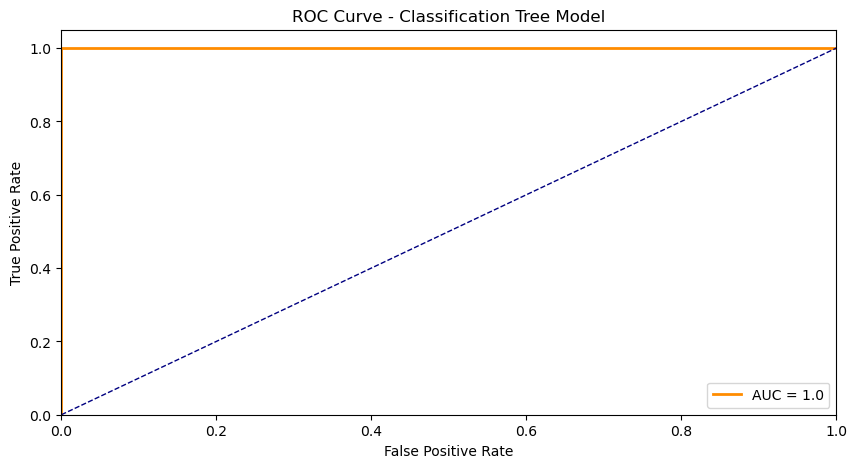

In [67]:
# Use the "try" flow control argument to "try" and generate ROC curve for the Discriminant Analysis model
try:
    # Get the probability predictions (not hard class predictions) for the TESTING data
    y_test_proba4 = classificationTree.predict_proba(X_test4)[:, 1]

    # Compute the False Positive Rate (fpr4), True Positive Rate (tpr4), and thresholds
    fpr4, tpr4, threshold4 = roc_curve(y_test4, y_test_proba4)

    # Compute the Area Under the Curve (AUC) score
    roc_auc4 = auc(fpr4, tpr4)

    # Print the raw AUC value for logging/analysis
    print('Classification Tree AUC score: ' + str(round(roc_auc4, 4)) + '\n')

    # Create a single axis plot
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot the ROC curve
    ax.plot(fpr4, tpr4, color='darkorange', lw=2, label='AUC = ' + str(round(roc_auc4, 2)))
    ax.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - Classification Tree Model')
    ax.legend(loc='lower right')

    # Display the ROC plot
    plt.show()

# Handle any errors that occur during prediction or ROC curve generation
except Exception as ex:
    print('Error occurred during ROC curve generation: ' + str(ex))

Classification Tree - Permutation Importances (Higher = More Important):

Scan_Type_Normal      0.17
Source_IP             0.00
Destination_IP        0.00
Port                  0.00
Payload_Size          0.00
User_Agent            0.00
Request_Type_FTP      0.00
Request_Type_HTTP     0.00
Request_Type_HTTPS    0.00
Request_Type_SMTP     0.00
Request_Type_SSH      0.00
Request_Type_Telnet   0.00
Protocol_TCP          0.00
Protocol_UDP          0.00
Status_Success        0.00
Scan_Type_PortScan    0.00
dtype: float64



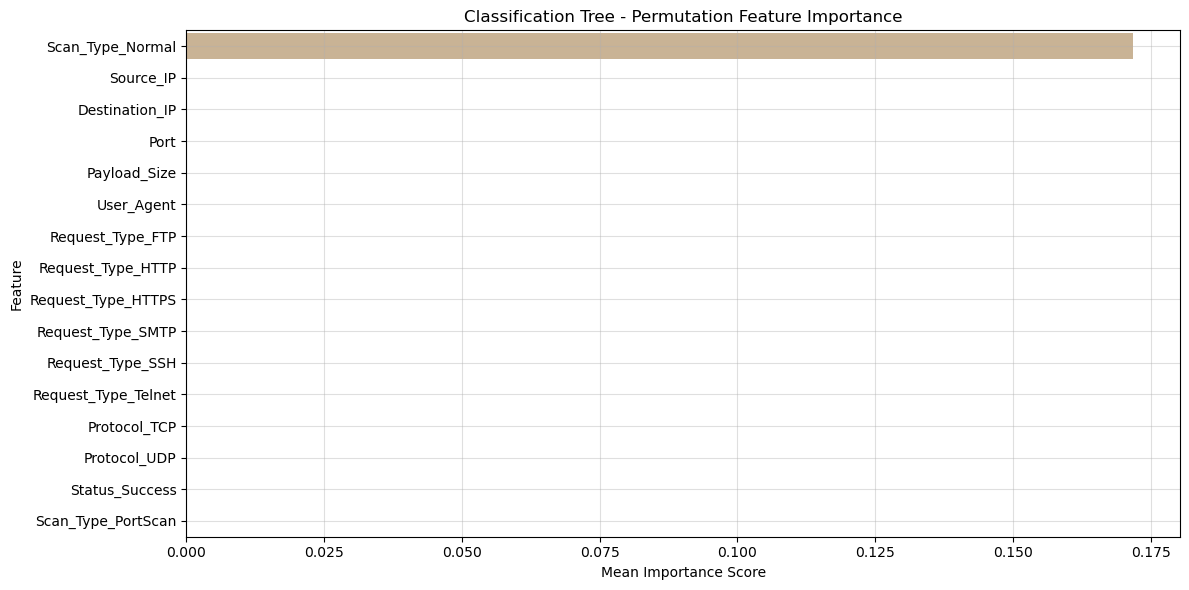

In [68]:
# Run permutation importance on the MLP model
result2 = permutation_importance(classificationTree, X_test4, y_test4, n_repeats=50, scoring='accuracy')

# Put the permutation importance results into a series
permImportance2 = pd.Series(result2.importances_mean, index=X_train4.columns)

# Sort the output in descending order (largest ---> smallest)
permImportance2.sort_values(ascending=False, inplace=True)

# Print out a verification statement for our user
print('Classification Tree - Permutation Importances (Higher = More Important):' + '\n' + '\n' + str(permImportance2) + '\n')

# Initialize the plot with a (figsize=(12,7))
plt.figure(figsize=(12, 6))
# Set the plot as a 'barplot' with x-axis as the permmutation importance values (.values) and the y-axis as the permutation importance indices (.index)
sns.barplot(x=permImportance2.values, y=permImportance2.index, color='tan')
plt.title('Classification Tree - Permutation Feature Importance')
plt.xlabel('Mean Importance Score')
plt.ylabel('Feature')
plt.grid(True, alpha=0.4)

# Display the plot
plt.tight_layout()
plt.show()

**<span style="color:chocolate; font-size:18px;">Saving our predictions:</span>**

- Now let's **save our predictions** to a **.csv file** for quick and easy access

In [69]:
# Use the "try" flow control argument to "try" and save our predictions to a csv (Classification Tree MODEL)
try:
    # Create the DataFrame with the prediction data for later merging (Classification Tree MODEL)
    predictionDf4 = pd.DataFrame({
        'Id': idsTest4,                 # To match the rows back to their original records, store the value of the id's from the testing data (idsTest4) into a new var called "Id" in the "predictionDf4"
        'Predicted Intrusion': y_pred4  # Store the model's predictions (y_pred4) in "Predicted Intrusion"
    })

    # To decode, loop through each original column that was one-hot encoded - i.e., stored in the "oneHotEncoders" dictionary from earlier
    for col in oneHotEncoders:
        # Retrieve the encoded OneHotEncoder "object" for the column
        encoder = oneHotEncoders[col]
        # Get the category that was dropped during encoding (due to drop='first'), set it equal to "droppedCategory"
        droppedCategory = encoder.categories_[0][0]
        # Get the names of the encoded columns (e.g., ['Protocol_TCP', 'Protocol_UDP']) using the ".get_feature_names_out()" function and store them in a list using the ".tolist()" function
        encodedCols = encoder.get_feature_names_out([col]).tolist()
        # Create a new column using the original name (e.g., 'Protocol'), with all values initially set to the dropped category
        networkData[col] = droppedCategory

        # Now, loop through each encoded column to map 1's back to their respective column
        for encodedColName in encodedCols:
            # Get the category (column) name which corresponds to this encoded column (offset by +1 because of the drop="First")
            matchingColumn = encoder.categories_[0][encodedCols.index(encodedColName) + 1]
            # For rows where the encoded column == 1, assign the correct column name (matchingColumn)
            networkData.loc[networkData[encodedColName] == 1, col] = matchingColumn

    # If the "User_Agent" is in the "labelEncoders" (dictionary)
    if 'User_Agent' in labelEncoders:
        # Use the "try" flow control argument to "try" and inversely transform each "User_Agent" 
        try:
            # Try decoding — will fail if already decoded
            networkData['User_Agent'] = labelEncoders['User_Agent'].inverse_transform(networkData['User_Agent'])
        # Handle any errors (Exceptions) that occur during the ".inverse_transform()" process with our generic error variable 'ex'
        except Exception as ex:
            # Skip decoding if already decoded (or any other issue occurs)
            print('Error: "User_Agents" already decoded! See below:' + '\n' + '\n' + str(ex) + '\n')

    # If the "Source_IP" is in the "labelEncoders" (dictionary)
    if 'Source_IP' in labelEncoders:
        try:
            networkData['Source_IP'] = labelEncoders['Source_IP'].inverse_transform(networkData['Source_IP'])
        except Exception as ex:
            print('Error: "Source_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # If the "Destination_IP" is in the "labelEncoders" (dictionary)
    if 'Destination_IP' in labelEncoders:
        try:
            networkData['Destination_IP'] = labelEncoders['Destination_IP'].inverse_transform(networkData['Destination_IP'])
        except Exception as ex:
            print('Error: "Destination_IP" already decoded or decoding failed.' + '\n' + '\n' + str(ex) + '\n')

    # Use a left join to ".merge()" the predictions back to the original dataset "networkData" (which contains Id and all decoded fields)
    results4 = pd.merge(networkData, predictionDf4, on='Id', how='left')

    # Reorder our columns for output
    results4 = results4[['Id', 'Source_IP', 'Destination_IP', 'Port', 'Request_Type', 'Protocol',
                       'Payload_Size', 'User_Agent', 'Status', 'Scan_Type', 'Intrusion', 'Predicted Intrusion']]

    # Save the resulting DataFrame to a .CSV file
    results4.to_csv('networkPredictionsDT.csv', index=False)

    # Inform the user of the successful .CSV export
    print("Predictions successfully saved to 'networkPredictionsDT.csv'.")

# Handle any errors (Exceptions) that occur during the .CSV export process with our generic error variable 'ex'
except Exception as ex:
    # Print a generic error message for our user
    print("Error occurred while saving the predictions to CSV: " + str(ex))

Predictions successfully saved to 'networkPredictionsDT.csv'.


**<span style="color:chocolate; font-size:18px;">Let's Save, View, and Export Our Decision Tree:</span>**

- Now let's **export our decision tree** to a **.pdf file** for easy viewing

In [70]:
# Use the "try" flow control argument to "try" and save/export our Classificatin Tree to a visualization (.pdf file)
try:
    # Generate the decision tree visualization in DOT format
    dot_data = export_graphviz(classificationTree,                                   # The trained model
                               out_file=None,                                        # Keep in memory
                               feature_names=X_train4.columns,                       # Our input features
                               class_names=classificationTree.classes_.astype(str),  # Our target class labels
                               filled=True, rounded=True, special_characters=True)

    # Convert the DOT format data to a graph object
    graph = graph_from_dot_data(dot_data)

    # Write the graph to a PDF file
    graph.write_pdf('classificationTreeModel.pdf')

    # Inform the user of the successful .pdf export
    print("Classification Tree visually exported as 'classificationTreeModel.pdf'.")

# Handle any errors (Exceptions) that occur during the .pdf export process with our generic error variable 'ex'
except Exception as ex:
    # Print error message if something goes wrong
    print("Error occurred while exporting Classification Tree: " + str(ex))

Classification Tree visually exported as 'classificationTreeModel.pdf'.


**<span style="color:chocolate; font-size:18px;">Final Thoughts (Classification Tree):</span>**

- Our **Classification Tree Model** performed perfectly on both the training and testing datasets, showing **incredibly strong predictive power, which may indicate overfitting**

- The **confusion matrix** confirmed flawless threat vs. non-threat classifications

- Our model has **consistently perfect false positive (precision) and false negative (recall) rates, each at 100%**

- The **ROC curve** shows us that the model performs perfectly with an **AUC score of 1.0, as the graph starts *and* stays at the top of the chart**

- Our model has a **kappa score of above 100%** indicating that **our model's predictions are well beyond what would be expected by random chance** 

- The model **consistently scores 100% accuracy - even with random** (80/20) **partitioning**

*These metrics indicate that the model is (almost too) perfectly reliable and performs consistently across different samples of the dataset.*

In conclusion, the **Classification Tree was our best performing model**. Strangely, the permutation importances and visualized decision tree we can see that the model only relied on "Scan_Type_Normal" to detect/reject an intrusion. It is very strange, and should warrant further investigation provided we had more time.

**<span style="color:blue; font-size:18px;">Final Review (All Models):</span>**

- Our **best performing models were the Logistic Regression (Full *or* Reduced)** or **Discriminant Analysis** models, consistently scoring **≥ 95% accuracy** and displaying strong generalization across different data splits

- The **Multilayer Perceptron (MLP) Neural Network model** also performed well, matching or slightly trailing the performance of our more linear models. Its performance fluctuated slightly due to random seed partitioning/weight intializations - but was overall very reliable

- The **Classification Tree despite its 100% accuracy** showed signs of overfitting, relying on exclusively one feature ("Scan_Type_Normal") to make predictions - a red flag indicating poor generalization

In conclusion, these **results indicate linear classification models are highly effective on this dataset**, likely due to the structure and separability of the feature set. While we met and exceeded our inital goal of ≥ 85% classification accuracy the project could be further improved (if given more time) through additional feature engineering, model regularization, hyperparameter tuning, or cross-validation to ensure robustness.